<a href="https://colab.research.google.com/github/Charles-Aymeric/moneyradar/blob/main/pib_par_habitant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

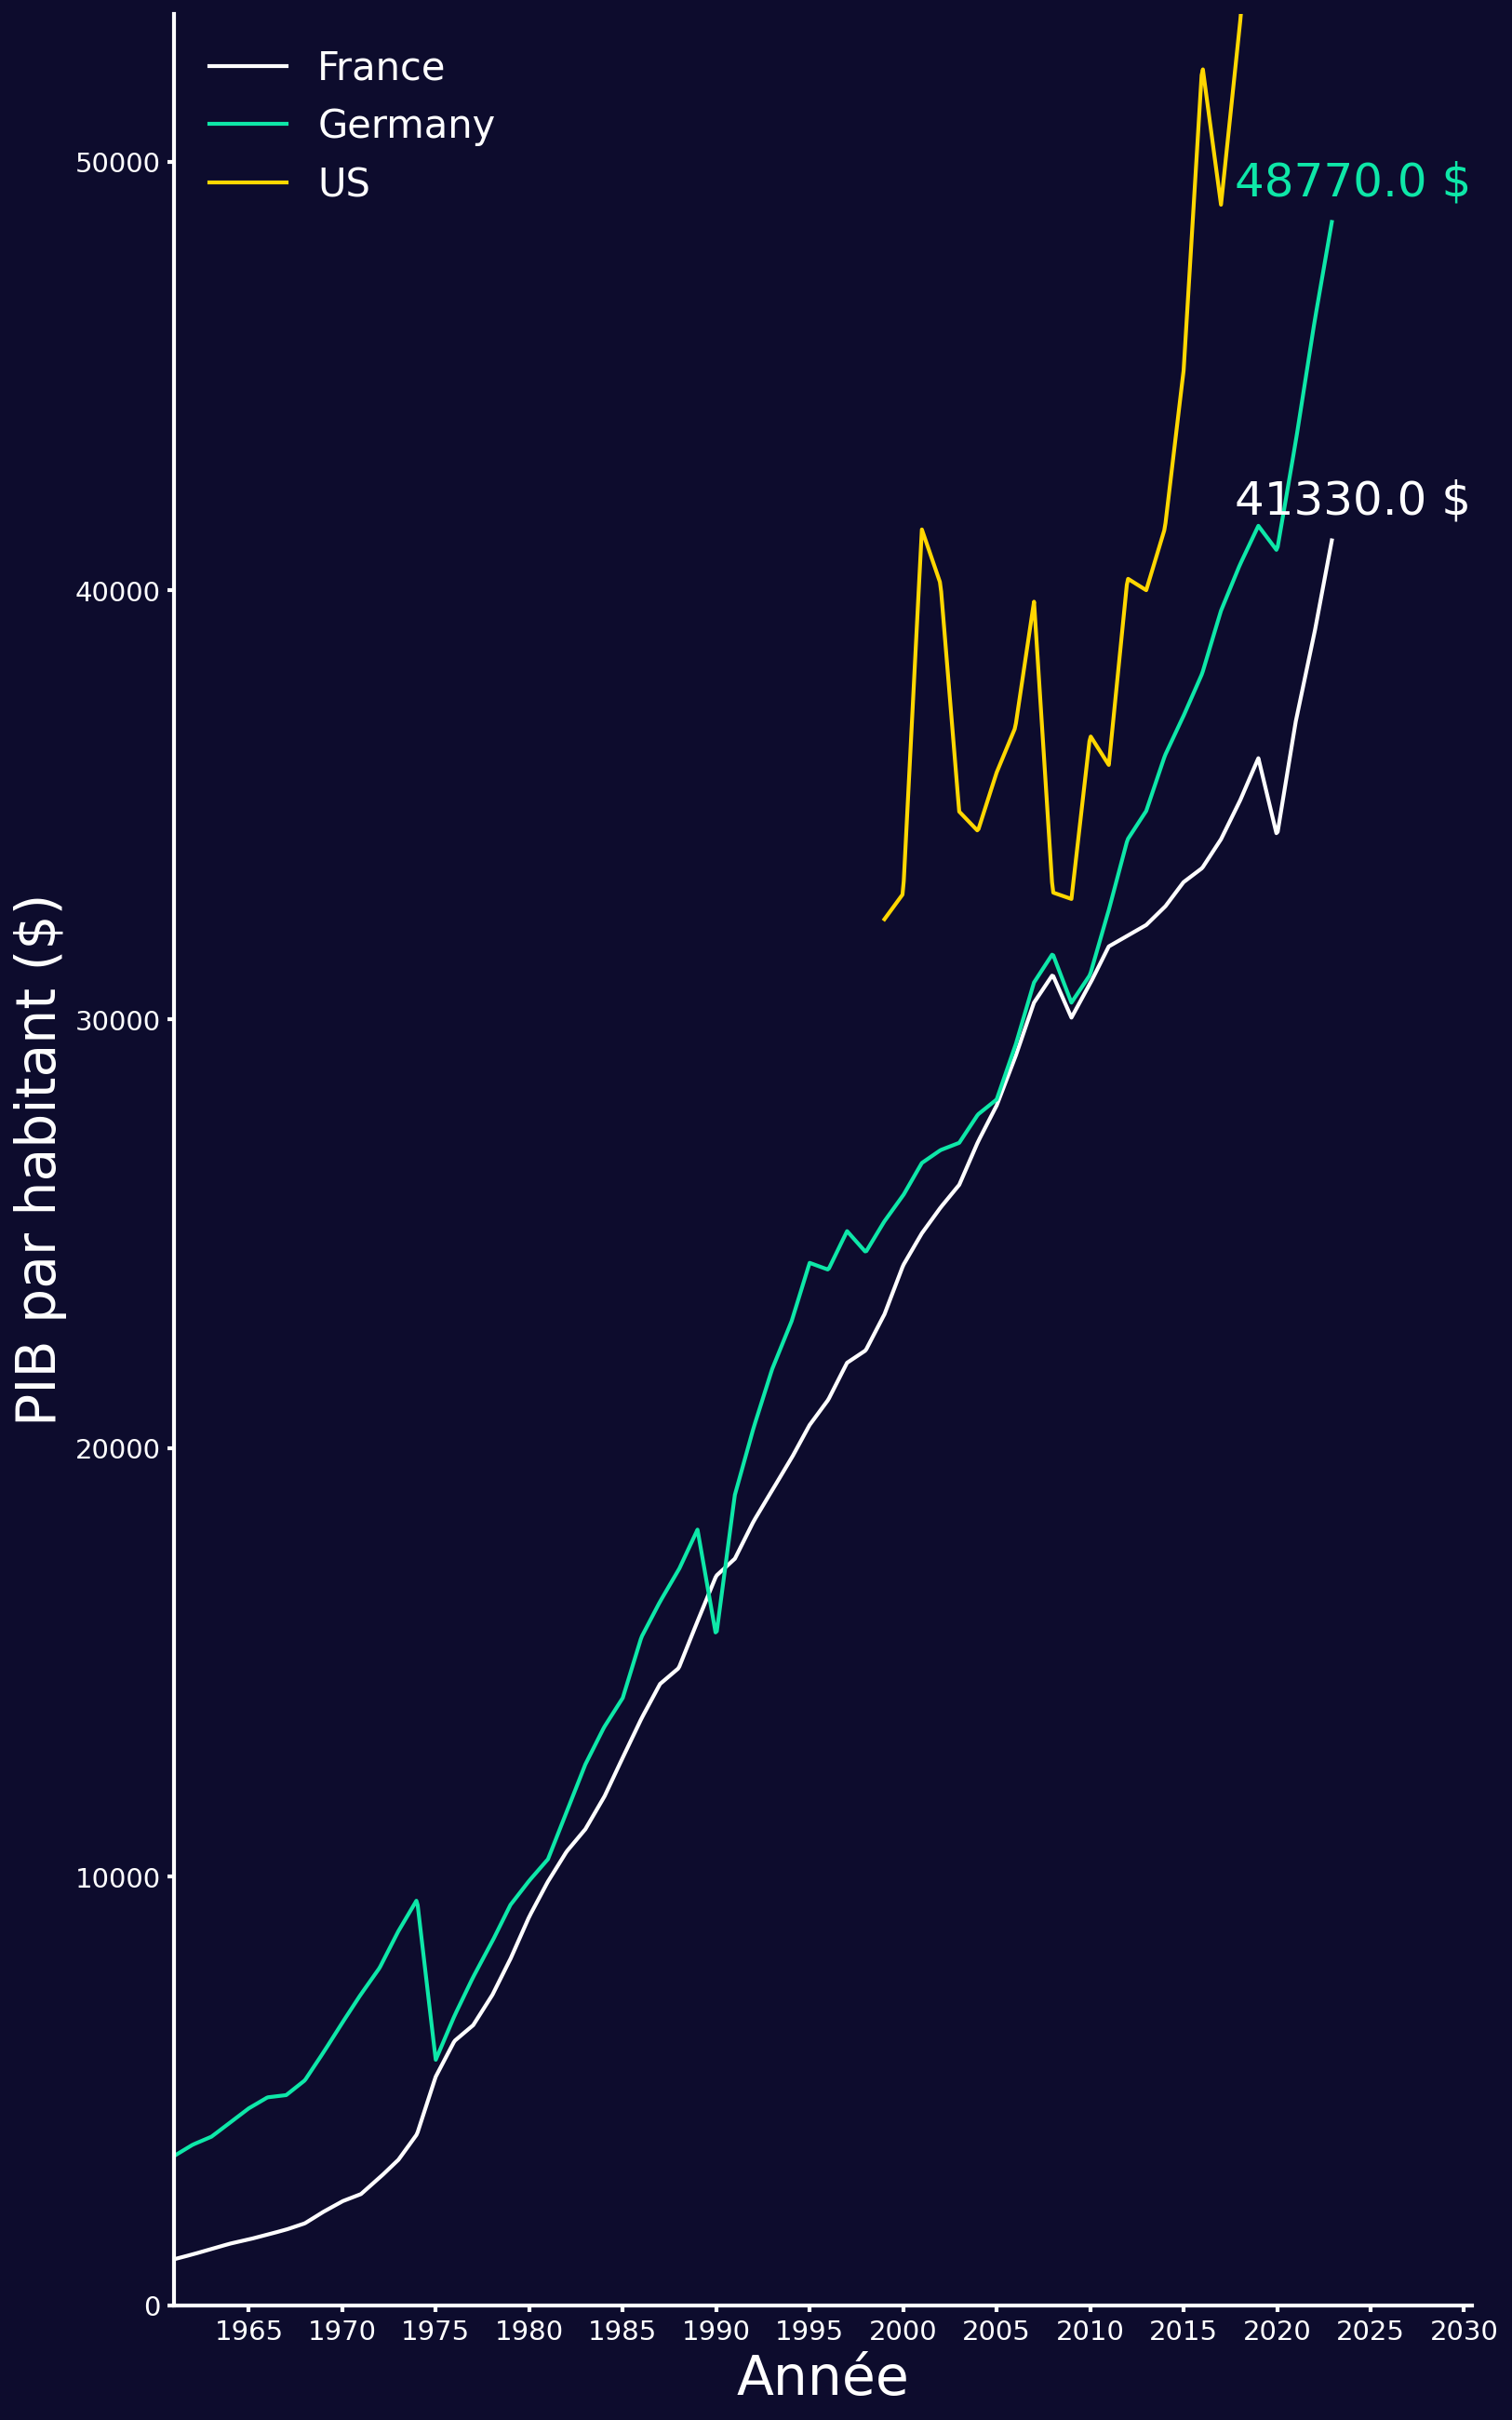

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.dates as mdates

# Load the CSV file
csv_file_path = "/content/GDP_per_capita_France_Germany_US.csv"
df_gdp = pd.read_csv(csv_file_path)

# Convert the 'Date' column to datetime format
df_gdp['Date'] = pd.to_datetime(df_gdp['Date'].astype(str) + '-01-01')

# Prepare data for interpolation and animation
x_data = df_gdp['Date'].values.astype('datetime64[D]')
total_frames = 15 * 60
time_interp = np.linspace(0, len(x_data) - 1, total_frames)
x_interp = np.interp(time_interp, np.arange(len(x_data)), x_data.astype(np.int64)).astype('datetime64[D]')
y_interp_france = np.interp(time_interp, np.arange(len(df_gdp)), df_gdp['PIB par habitant (France)'])
y_interp_germany = np.interp(time_interp, np.arange(len(df_gdp)), df_gdp['PIB par habitant (Germany)'])
y_interp_us = np.interp(time_interp, np.arange(len(df_gdp)), df_gdp['PIB par habitant (US)'])

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 21.33), dpi=150)

# Background color
fig.patch.set_facecolor('#0D0C2D')
ax1.set_facecolor('#0D0C2D')

# Remove top and right frames
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Configure the x-axis to show years every 5 years
ax1.xaxis.set_major_locator(mdates.YearLocator(5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Line colors
color_france = 'white'
color_germany = '#0EE7A8'
color_us = '#FFD700'

# Set axis and label colors to white and thicken the axes
ax1.spines['left'].set_color('white')
ax1.spines['bottom'].set_color('white')
ax1.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.tick_params(axis='x', colors='white', labelsize=14, width=2)
ax1.tick_params(axis='y', colors='white', labelsize=14, width=2)
ax1.yaxis.label.set_color('white')
ax1.xaxis.label.set_color('white')

# Create the data lines
line_france, = ax1.plot([], [], label='France', lw=2, color=color_france)
line_germany, = ax1.plot([], [], label='Germany', lw=2, color=color_germany)
line_us, = ax1.plot([], [], label='US', lw=2, color=color_us)

# Initialiser la fonction pour la configuration de l'animation
def init():
    line_france.set_data([], [])
    line_germany.set_data([], [])
    line_us.set_data([], [])
    ax1.set_xlim(x_interp.min(), x_interp.max() + np.timedelta64(3652, 'D') * 1.5)
    ax1.set_ylim(0, max(y_interp_france.max(), y_interp_germany.max(), y_interp_us.max()) * 1.1)
    ax1.set_xlabel('Année', fontsize=28)
    ax1.set_ylabel('PIB par habitant ($)', fontsize=28, color='white')
    ax1.legend(loc='upper left', fontsize=20, facecolor='#0D0C2D', labelcolor='white', frameon=False, handlelength=2)
    return line_france, line_germany, line_us

# Fonction pour mettre à jour l'animation
def update(frame):
    # Mise à jour des données des lignes
    line_france.set_data(x_interp[:frame], y_interp_france[:frame])
    line_germany.set_data(x_interp[:frame], y_interp_germany[:frame])
    line_us.set_data(x_interp[:frame], y_interp_us[:frame])

    # Mise à jour des limites des axes si la séquence n'est pas vide
    if frame > 0:
        ax1.set_ylim(0, max(y_interp_france[:frame].max(), y_interp_germany[:frame].max(), y_interp_us[:frame].max()) * 1.1)
        range_x = x_interp.max() - x_interp.min()
        ax1.set_xlim(x_interp[0], x_interp[0] + range_x * (frame / total_frames) + np.timedelta64(3652, 'D') * 0.75)

        for ann in ax1.texts:
            ann.remove()

        ax1.annotate(f"{y_interp_france[frame]:.1f} $", (x_interp[frame], y_interp_france[frame]),
                     textcoords="offset points", xytext=(10, 10), ha='center', color=color_france, fontsize=24)
        ax1.annotate(f"{y_interp_germany[frame]:.1f} $", (x_interp[frame], y_interp_germany[frame]),
                     textcoords="offset points", xytext=(10, 10), ha='center', color=color_germany, fontsize=24)
        ax1.annotate(f"{y_interp_us[frame]:.1f} $", (x_interp[frame], y_interp_us[frame]),
                     textcoords="offset points", xytext=(10, 10), ha='center', color=color_us, fontsize=24)

    return line_france, line_germany, line_us

# Créer l'animation avec 60 images par seconde (interval=1000/60 millisecondes)
ani = FuncAnimation(fig, update, frames=total_frames, init_func=init, blit=True, interval=1000/60, repeat=False)

# Enregistrer l'animation en tant que fichier vidéo
ani.save('gdp_animation.mp4', writer='ffmpeg')

# Afficher l'animation dans le notebook
HTML('<video controls src="gdp_animation.mp4" type="video/mp4">')


<ipython-input-3-2fbe3f5530f2>:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(size, Image.ANTIALIAS)
<ipython-input-3-2fbe3f5530f2>:114: RuntimeWarning: All-NaN slice encountered
  np.nanmax(y_interp_us[:frame])


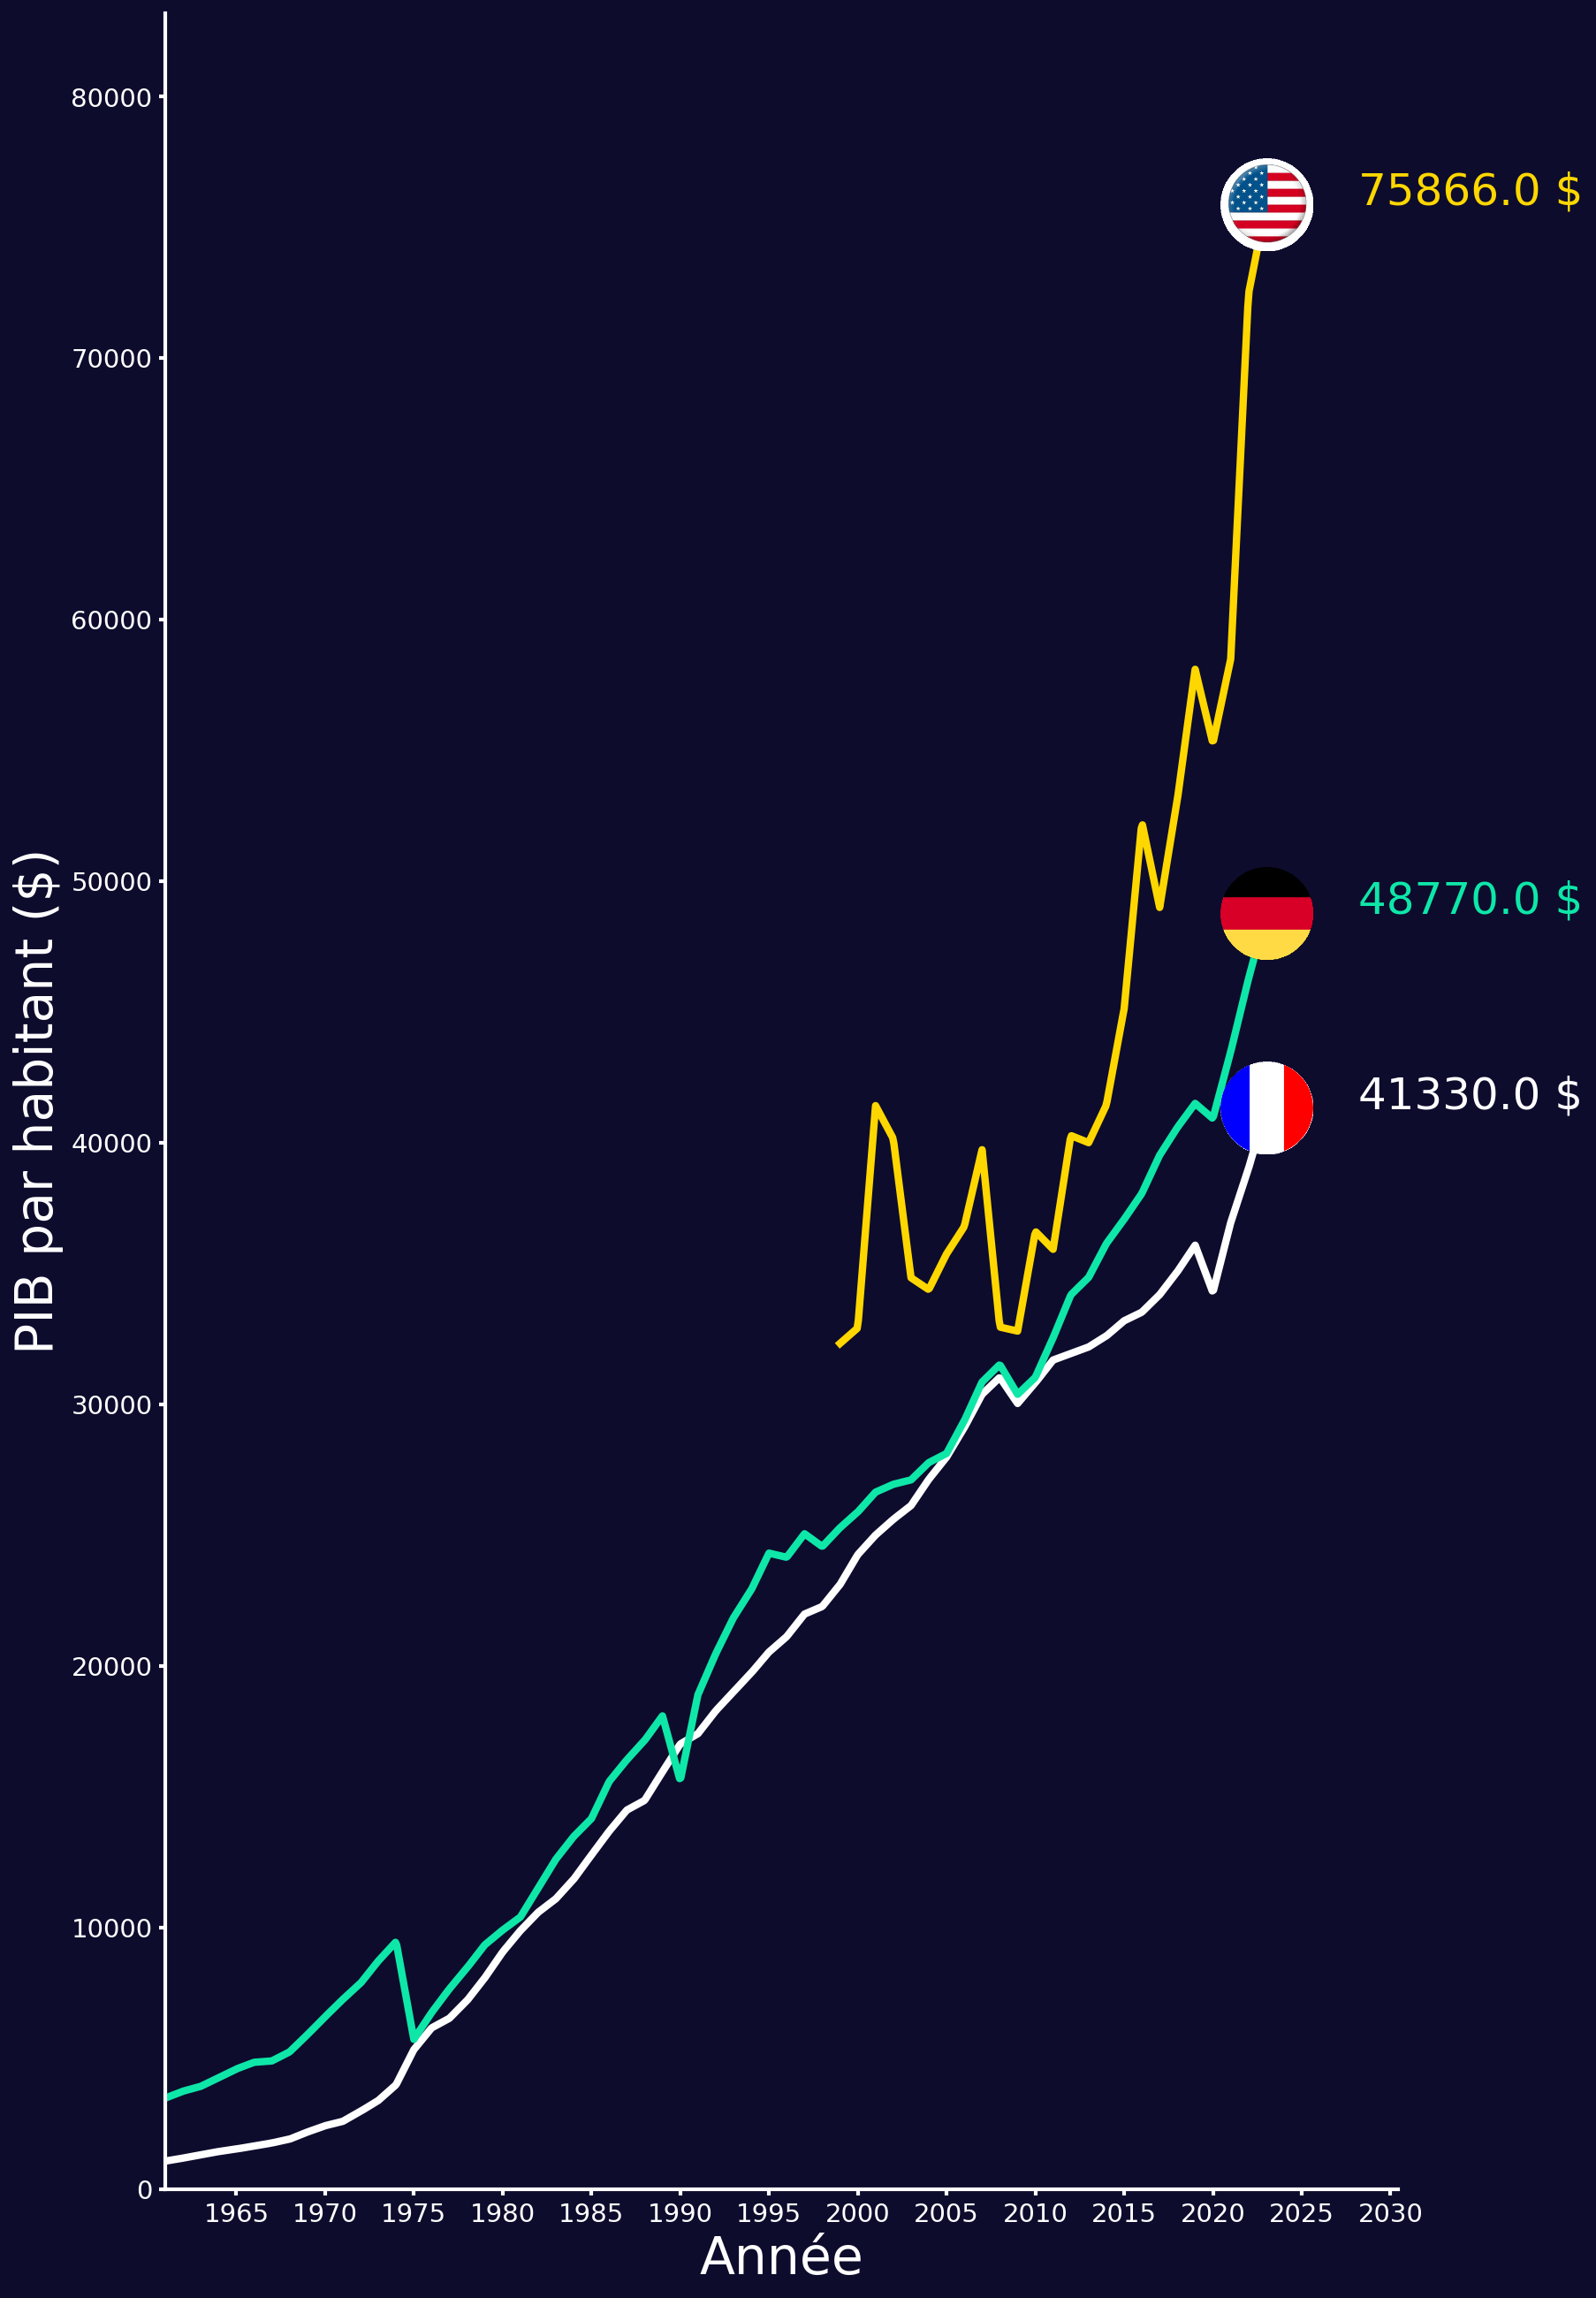

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.dates as mdates
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image, ImageOps, ImageDraw

def circular_mask(image_path, size):
    img = Image.open(image_path).convert("RGBA")
    img = img.resize(size, Image.ANTIALIAS)

    mask = Image.new("L", img.size, 0)
    draw = ImageDraw.Draw(mask)
    draw.ellipse((0, 0) + img.size, fill=255)

    output = ImageOps.fit(img, mask.size, centering=(0.5, 0.5))
    output.putalpha(mask)

    return output

# Load the CSV file
csv_file_path = "/content/GDP_per_capita_France_Germany_US.csv"
df_gdp = pd.read_csv(csv_file_path)

# Convert the 'Date' column to datetime format
df_gdp['Date'] = pd.to_datetime(df_gdp['Date'].astype(str) + '-01-01')

# Prepare data for interpolation and animation
x_data = df_gdp['Date'].values.astype('datetime64[D]')
total_frames = 15 * 60
time_interp = np.linspace(0, len(x_data) - 1, total_frames)
x_interp = np.interp(time_interp, np.arange(len(x_data)), x_data.astype(np.int64)).astype('datetime64[D]')
y_interp_france = np.interp(time_interp, np.arange(len(df_gdp)), df_gdp['PIB par habitant (France)'])
y_interp_germany = np.interp(time_interp, np.arange(len(df_gdp)), df_gdp['PIB par habitant (Germany)'])
y_interp_us = np.interp(time_interp, np.arange(len(df_gdp)), df_gdp['PIB par habitant (US)'])

# Load and transform flag images
flag_france = circular_mask("/content/drapeau france.png", (200, 200))
flag_germany = circular_mask("/content/drapeau allemagne.png", (200, 200))
flag_us = circular_mask("/content/drapeau usa.png", (200, 200))

# Convert PIL images to numpy arrays
flag_france = np.array(flag_france)
flag_germany = np.array(flag_germany)
flag_us = np.array(flag_us)

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 21.33), dpi=150)

# Background color
fig.patch.set_facecolor('#0D0C2D')
ax1.set_facecolor('#0D0C2D')

# Remove top and right frames
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Configure the x-axis to show years every 5 years
ax1.xaxis.set_major_locator(mdates.YearLocator(5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Line colors
color_france = 'white'
color_germany = '#0EE7A8'
color_us = '#FFD700'

# Set axis and label colors to white and thicken the axes
ax1.spines['left'].set_color('white')
ax1.spines['bottom'].set_color('white')
ax1.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.tick_params(axis='x', colors='white', labelsize=14, width=2)
ax1.tick_params(axis='y', colors='white', labelsize=14, width=2)
ax1.yaxis.label.set_color('white')
ax1.xaxis.label.set_color('white')

# Create the data lines with increased thickness
line_france, = ax1.plot([], [], label='France', lw=4, color=color_france)
line_germany, = ax1.plot([], [], label='Germany', lw=4, color=color_germany)
line_us, = ax1.plot([], [], label='US', lw=4, color=color_us)

def check_annotation_overlap(annotations, new_annotation):
    for ann in annotations:
        if ann.xy[1] == new_annotation.xy[1]:
            if abs(ann.xy[0] - new_annotation.xy[0]) < 10:
                return True
    return False

# Initialize the function for setting up the animation
def init():
    line_france.set_data([], [])
    line_germany.set_data([], [])
    line_us.set_data([], [])
    ax1.set_xlim(x_interp.min(), x_interp.max() + np.timedelta64(3652, 'D') * 1.5)
    ax1.set_ylim(0, max(y_interp_france.max(), y_interp_germany.max(), np.nanmax(y_interp_us)) * 1.1)
    ax1.set_xlabel('Année', fontsize=28)
    ax1.set_ylabel('PIB par habitant ($)', fontsize=28, color='white')
    return line_france, line_germany, line_us

# Function to update the animation
def update(frame):
    # Update the data lines
    line_france.set_data(x_interp[:frame], y_interp_france[:frame])
    line_germany.set_data(x_interp[:frame], y_interp_germany[:frame])
    line_us.set_data(x_interp[:frame], y_interp_us[:frame])

    # Update the axis limits if the sequence is not empty
    if frame > 0:
        current_max = max(
            np.nanmax(y_interp_france[:frame]),
            np.nanmax(y_interp_germany[:frame]),
            np.nanmax(y_interp_us[:frame])
        ) * 1.1
        ax1.set_ylim(0, current_max)
        range_x = x_interp.max() - x_interp.min()
        ax1.set_xlim(x_interp[0], x_interp[0] + range_x * (frame / total_frames) + np.timedelta64(3652, 'D') * 0.75)

        for ann in ax1.texts:
            ann.remove()
        for artist in ax1.artists:
            artist.remove()

        annotations = []
        for y_interp, color, label in zip(
            [y_interp_france, y_interp_germany, y_interp_us],
            [color_france, color_germany, color_us],
            ['France', 'Germany', 'US']
        ):
            annot = ax1.annotate(
                f"{y_interp[frame]:.1f} $", (x_interp[frame], y_interp[frame]),
                textcoords="offset points", xytext=(50, 0), ha='left',  # Adjusted position further to the right
                color=color, fontsize=24
            )
            if check_annotation_overlap(annotations, annot):
                annot.set_position((50, 10))
            annotations.append(annot)

        # Add flag images
        flag_france_image = OffsetImage(flag_france, zoom=0.25)  # Adjusted zoom for 200x200 size
        flag_germany_image = OffsetImage(flag_germany, zoom=0.25)  # Adjusted zoom for 200x200 size
        flag_us_image = OffsetImage(flag_us, zoom=0.25)  # Adjusted zoom for 200x200 size

        flag_france_annot = AnnotationBbox(flag_france_image, (x_interp[frame], y_interp_france[frame]), frameon=False)
        flag_germany_annot = AnnotationBbox(flag_germany_image, (x_interp[frame], y_interp_germany[frame]), frameon=False)
        flag_us_annot = AnnotationBbox(flag_us_image, (x_interp[frame], y_interp_us[frame]), frameon=False)

        ax1.add_artist(flag_france_annot)
        ax1.add_artist(flag_germany_annot)
        ax1.add_artist(flag_us_annot)

    return line_france, line_germany, line_us

# Create the animation with 60 frames per second (interval=1000/60 milliseconds)
ani = FuncAnimation(fig, update, frames=total_frames, init_func=init, blit=True, interval=1000/60, repeat=False)

# Save the animation as a video file
ani.save('gdp_animation.mp4', writer='ffmpeg')

# Display the animation in the notebook
HTML('<video controls src="gdp_animation.mp4" type="video/mp4">')


<ipython-input-10-753c6c3bf429>:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(size, Image.ANTIALIAS)
<ipython-input-10-753c6c3bf429>:113: RuntimeWarning: All-NaN slice encountered
  np.nanmax(y_interp_us[:frame])


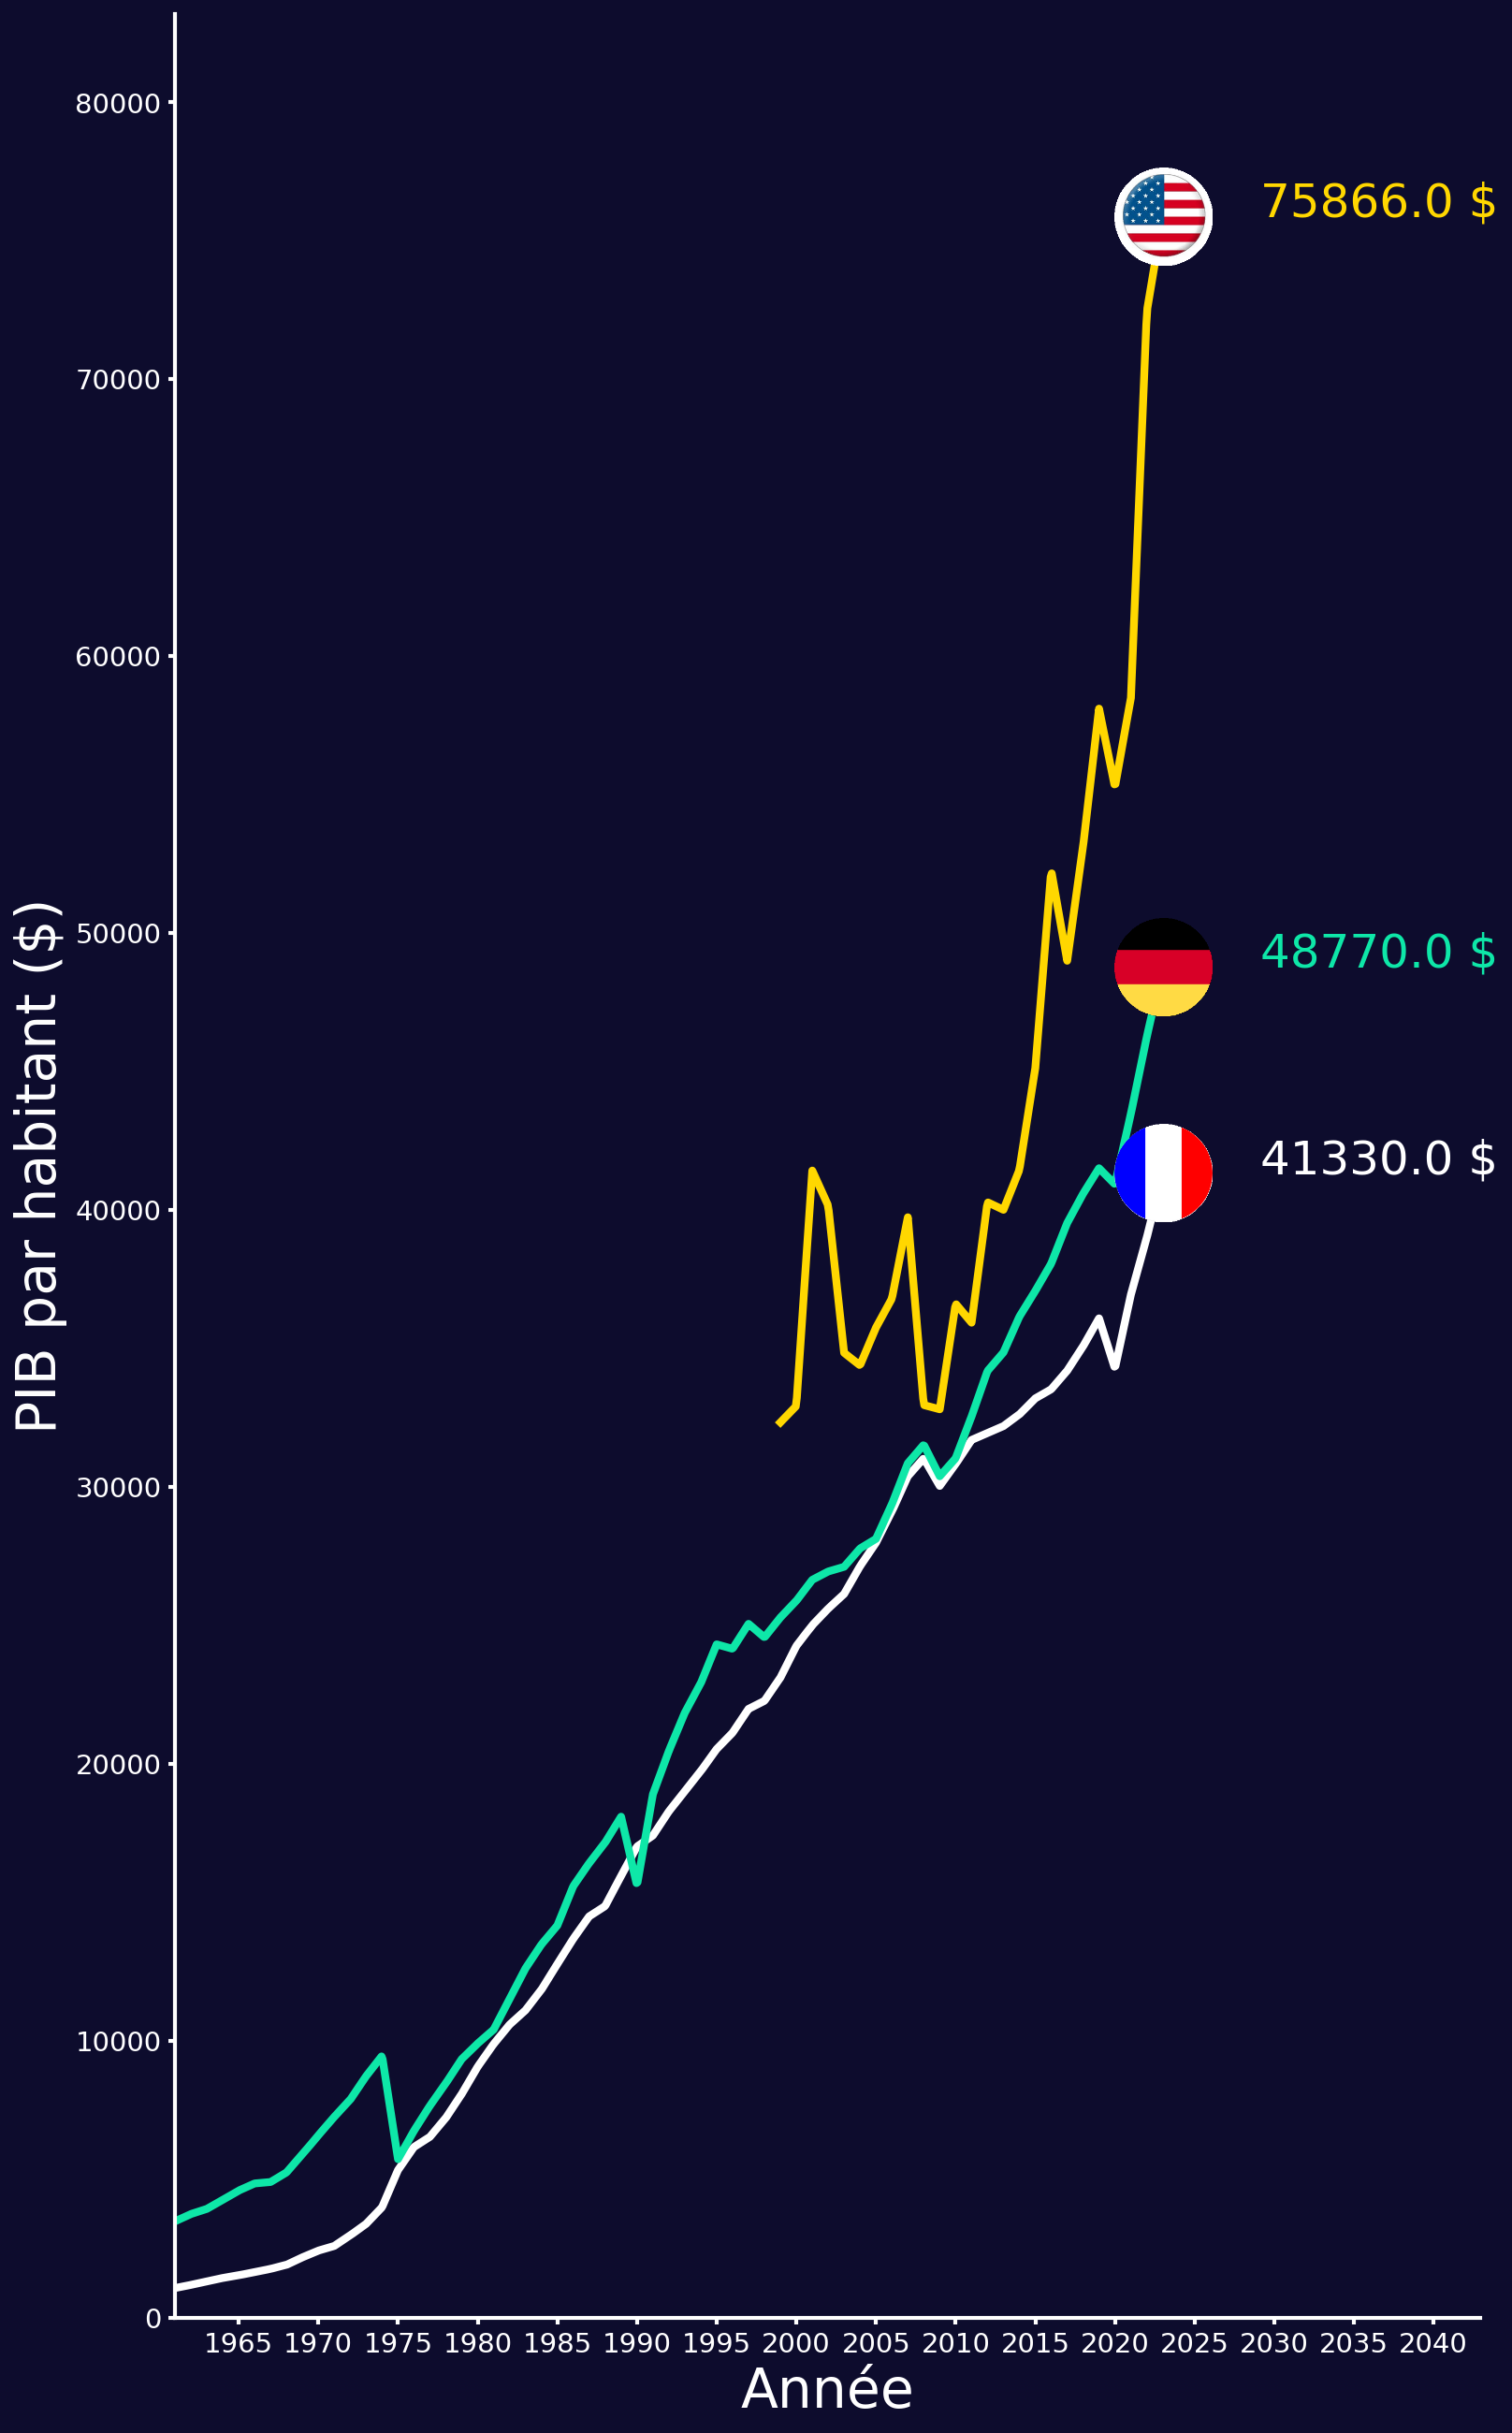

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.dates as mdates
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image, ImageOps, ImageDraw

def circular_mask(image_path, size):
    img = Image.open(image_path).convert("RGBA")
    img = img.resize(size, Image.ANTIALIAS)

    mask = Image.new("L", img.size, 0)
    draw = ImageDraw.Draw(mask)
    draw.ellipse((0, 0) + img.size, fill=255)

    output = ImageOps.fit(img, mask.size, centering=(0.5, 0.5))
    output.putalpha(mask)

    return output

# Load the CSV file
csv_file_path = "/content/GDP_per_capita_France_Germany_US.csv"
df_gdp = pd.read_csv(csv_file_path)

# Convert the 'Date' column to datetime format
df_gdp['Date'] = pd.to_datetime(df_gdp['Date'].astype(str) + '-01-01')

# Prepare data for interpolation and animation
x_data = df_gdp['Date'].values.astype('datetime64[D]')
total_frames = 15 * 60
time_interp = np.linspace(0, len(x_data) - 1, total_frames)
x_interp = np.interp(time_interp, np.arange(len(x_data)), x_data.astype(np.int64)).astype('datetime64[D]')
y_interp_france = np.interp(time_interp, np.arange(len(df_gdp)), df_gdp['PIB par habitant (France)'])
y_interp_germany = np.interp(time_interp, np.arange(len(df_gdp)), df_gdp['PIB par habitant (Germany)'])
y_interp_us = np.interp(time_interp, np.arange(len(df_gdp)), df_gdp['PIB par habitant (US)'])

# Load and transform flag images
flag_france = circular_mask("/content/drapeau_france.png", (200, 200))
flag_germany = circular_mask("/content/drapeau_allemagne.png", (200, 200))
flag_us = circular_mask("/content/drapeau_usa.png", (200, 200))

# Convert PIL images to numpy arrays
flag_france = np.array(flag_france)
flag_germany = np.array(flag_germany)
flag_us = np.array(flag_us)

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 21.33), dpi=150)

# Background color
fig.patch.set_facecolor('#0D0C2D')
ax1.set_facecolor('#0D0C2D')

# Remove top and right frames
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Configure the x-axis to show years every 5 years
ax1.xaxis.set_major_locator(mdates.YearLocator(5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Line colors
color_france = 'white'
color_germany = '#0EE7A8'
color_us = '#FFD700'

# Set axis and label colors to white and thicken the axes
ax1.spines['left'].set_color('white')
ax1.spines['bottom'].set_color('white')
ax1.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.tick_params(axis='x', colors='white', labelsize=14, width=2)
ax1.tick_params(axis='y', colors='white', labelsize=14, width=2)
ax1.yaxis.label.set_color('white')
ax1.xaxis.label.set_color('white')

# Create the data lines with increased thickness
line_france, = ax1.plot([], [], label='France', lw=4, color=color_france)
line_germany, = ax1.plot([], [], label='Germany', lw=4, color=color_germany)
line_us, = ax1.plot([], [], label='US', lw=4, color=color_us)

# Initialize the function for setting up the animation
def init():
    line_france.set_data([], [])
    line_germany.set_data([], [])
    line_us.set_data([], [])
    ax1.set_xlim(x_interp.min(), x_interp.max() + np.timedelta64(3652, 'D') * 3)  # Further increased right margin
    ax1.set_ylim(0, max(y_interp_france.max(), y_interp_germany.max(), np.nanmax(y_interp_us)) * 1.1)
    ax1.set_xlabel('Année', fontsize=28)
    ax1.set_ylabel('PIB par habitant ($)', fontsize=28, color='white')
    return line_france, line_germany, line_us

def avoid_overlap(annotations, new_annotation):
    for ann in annotations:
        if abs(ann.xy[1] - new_annotation.xy[1]) < 30:  # assuming font size ~24 + padding
            return True
    return False

# Function to update the animation
def update(frame):
    # Update the data lines
    line_france.set_data(x_interp[:frame], y_interp_france[:frame])
    line_germany.set_data(x_interp[:frame], y_interp_germany[:frame])
    line_us.set_data(x_interp[:frame], y_interp_us[:frame])

    # Update the axis limits if the sequence is not empty
    if frame > 0:
        current_max = max(
            np.nanmax(y_interp_france[:frame]),
            np.nanmax(y_interp_germany[:frame]),
            np.nanmax(y_interp_us[:frame])
        ) * 1.1
        ax1.set_ylim(0, current_max)
        range_x = x_interp.max() - x_interp.min()
        ax1.set_xlim(x_interp[0], x_interp[0] + range_x * (frame / total_frames) + np.timedelta64(3652, 'D') * 2)

        for ann in ax1.texts:
            ann.remove()
        for artist in ax1.artists:
            artist.remove()

        annotations = []
        for y_interp, color, label in zip(
            [y_interp_france, y_interp_germany, y_interp_us],
            [color_france, color_germany, color_us],
            ['France', 'Germany', 'US']
        ):
            offset_y = 0
            new_annotation = ax1.annotate(
                f"{y_interp[frame]:.1f} $", (x_interp[frame], y_interp[frame]),
                textcoords="offset points", xytext=(50, offset_y), ha='left',  # Closer to the right
                color=color, fontsize=24
            )
            while avoid_overlap(annotations, new_annotation):
                offset_y += 30
                new_annotation.remove()
                new_annotation = ax1.annotate(
                    f"{y_interp[frame]:.1f} $", (x_interp[frame], y_interp[frame] + offset_y),
                    textcoords="offset points", xytext=(50, offset_y), ha='left',  # Adjusting the vertical offset
                    color=color, fontsize=24
                )
            annotations.append(new_annotation)

        # Add flag images
        flag_france_image = OffsetImage(flag_france, zoom=0.25)  # Adjusted zoom for 200x200 size
        flag_germany_image = OffsetImage(flag_germany, zoom=0.25)  # Adjusted zoom for 200x200 size
        flag_us_image = OffsetImage(flag_us, zoom=0.25)  # Adjusted zoom for 200x200 size

        flag_france_annot = AnnotationBbox(flag_france_image, (x_interp[frame], y_interp_france[frame]), frameon=False)
        flag_germany_annot = AnnotationBbox(flag_germany_image, (x_interp[frame], y_interp_germany[frame]), frameon=False)
        flag_us_annot = AnnotationBbox(flag_us_image, (x_interp[frame], y_interp_us[frame]), frameon=False)

        ax1.add_artist(flag_france_annot)
        ax1.add_artist(flag_germany_annot)
        ax1.add_artist(flag_us_annot)

    return line_france, line_germany, line_us

# Create the animation with 60 frames per second (interval=1000/60 milliseconds)
ani = FuncAnimation(fig, update, frames=total_frames, init_func=init, blit=True, interval=1000/60, repeat=False)

# Save the animation as a video file
ani.save('gdp_animation.mp4', writer='ffmpeg')

# Display the animation in the notebook
HTML('<video controls src="gdp_animation.mp4" type="video/mp4">')


<ipython-input-2-97d25c4244b5>:111: RuntimeWarning: All-NaN slice encountered
  np.nanmax(y_interp_us[:frame])


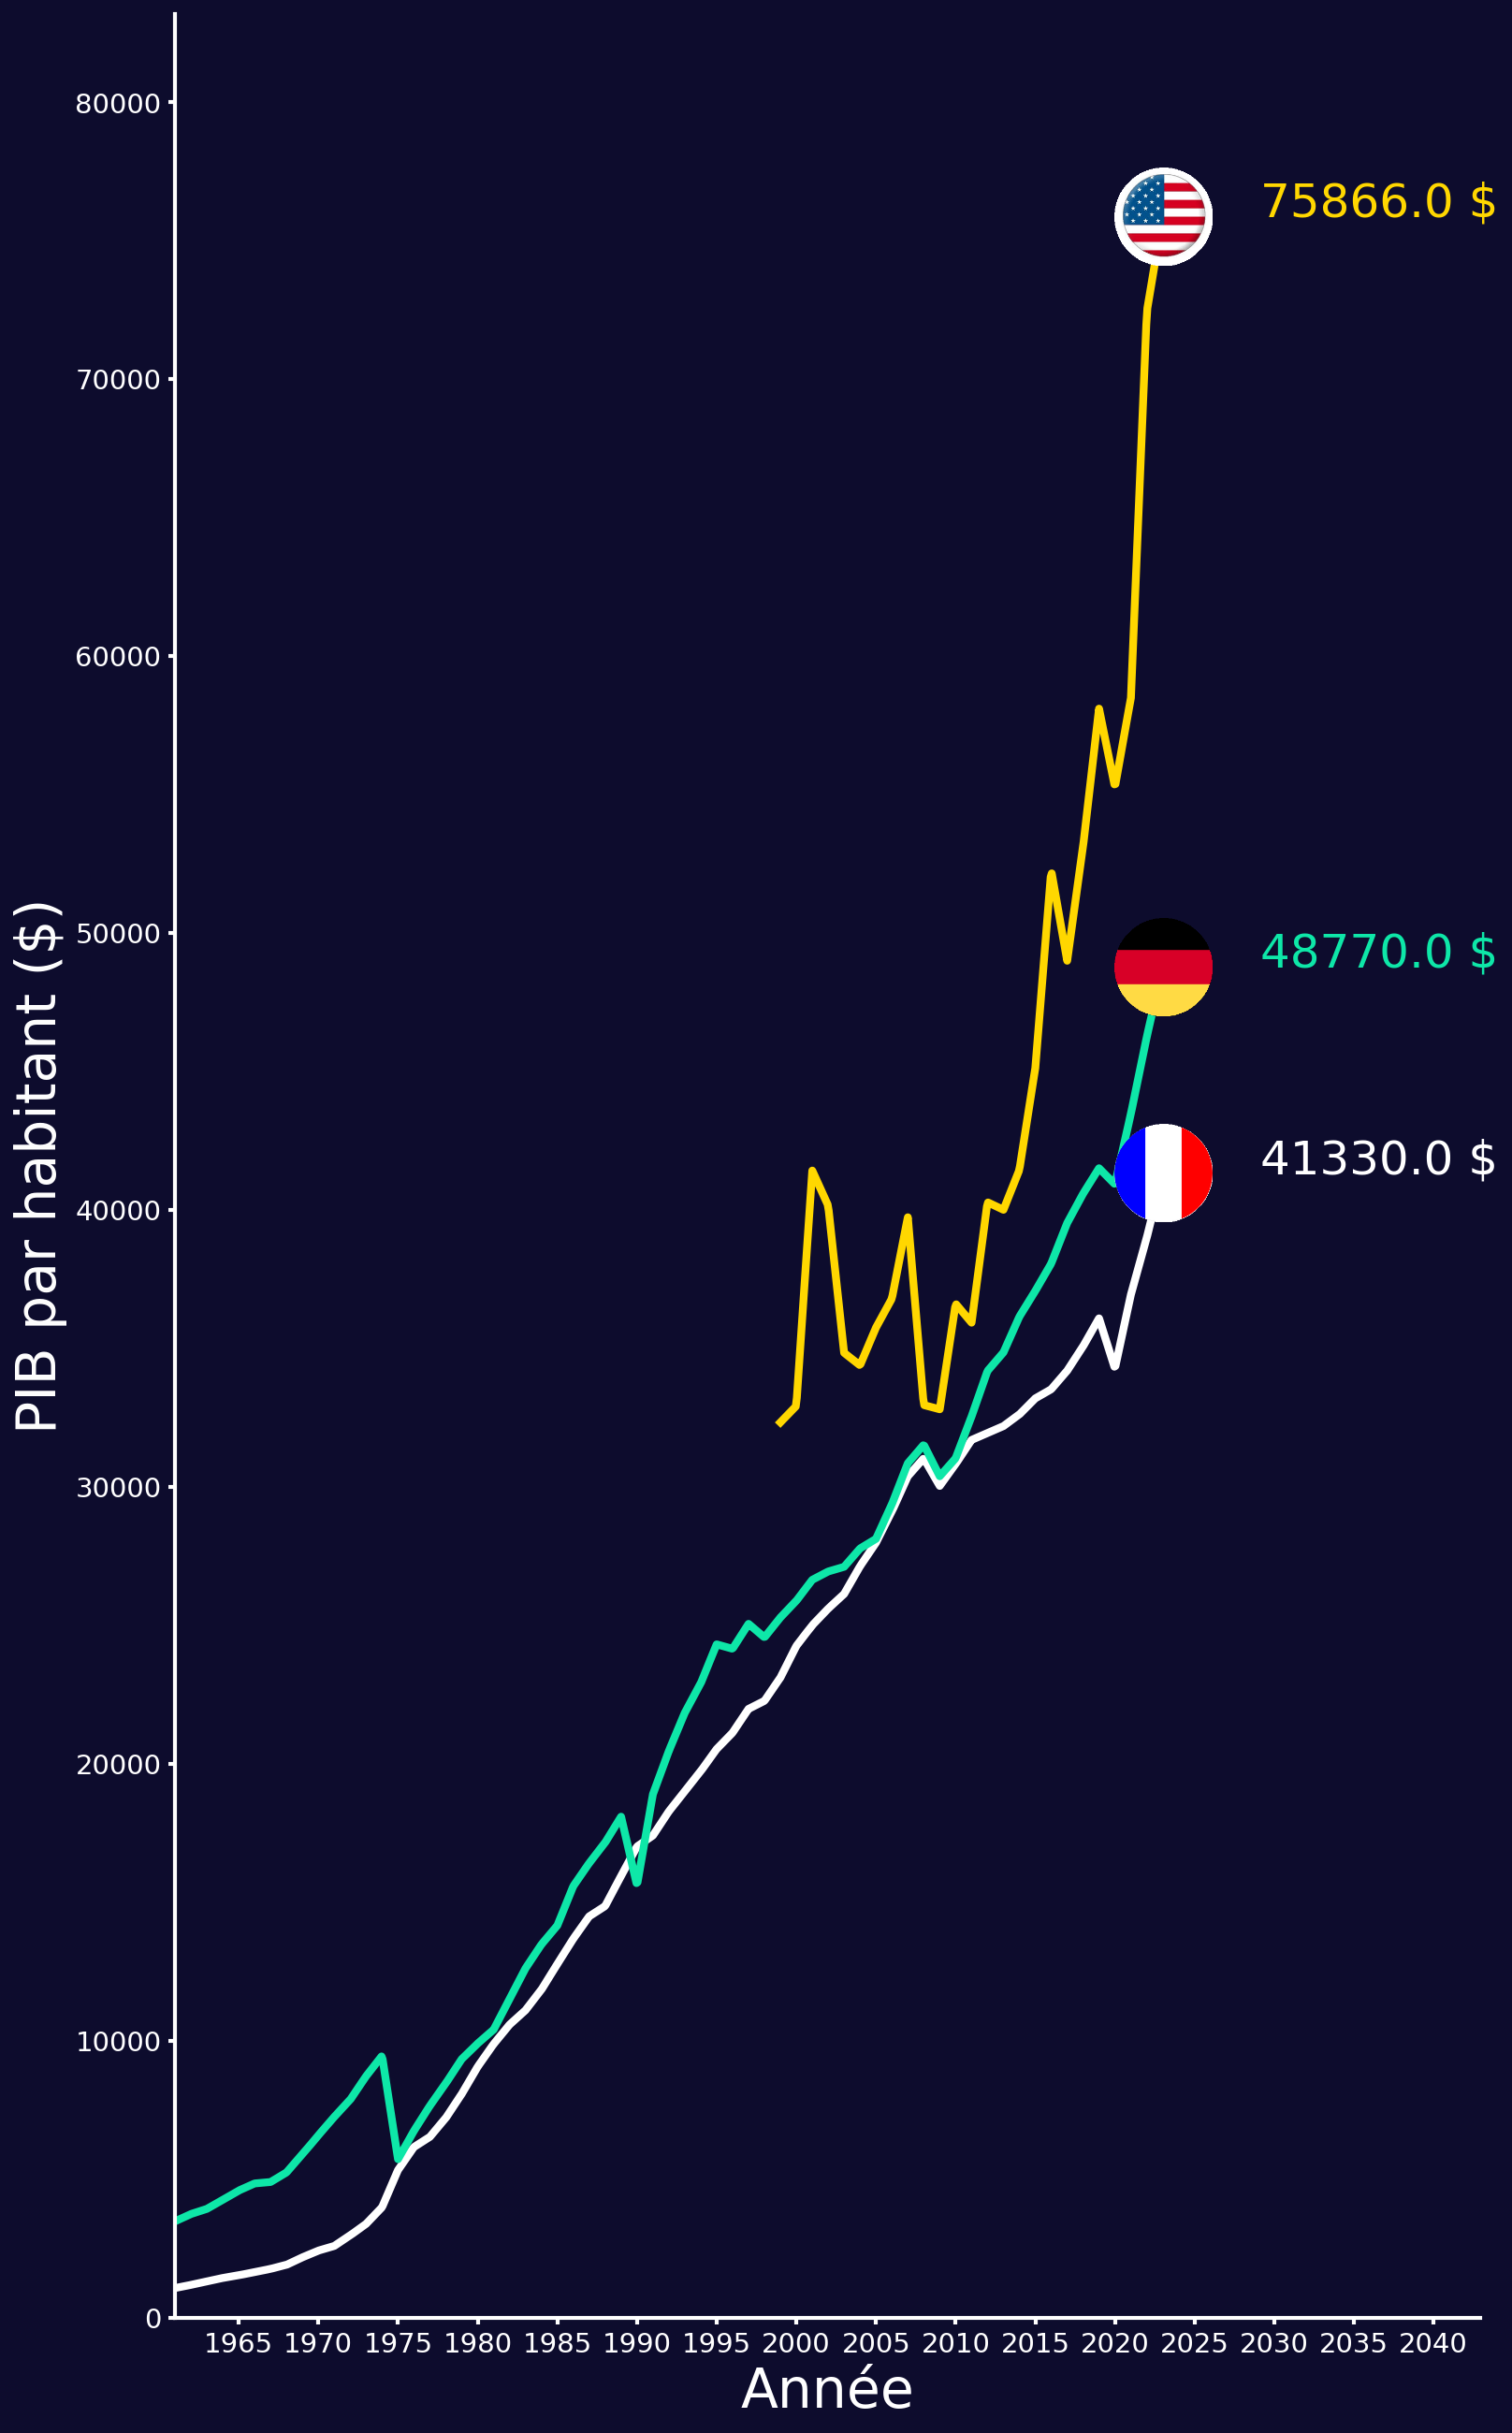

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.dates as mdates
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image, ImageOps, ImageDraw

def circular_mask(image_path, size):
    img = Image.open(image_path).convert("RGBA")
    img = img.resize(size, Image.LANCZOS)

    mask = Image.new("L", img.size, 0)
    draw = ImageDraw.Draw(mask)
    draw.ellipse((0, 0) + img.size, fill=255)

    output = ImageOps.fit(img, mask.size, centering=(0.5, 0.5))
    output.putalpha(mask)

    return output

# Load the CSV file
csv_file_path = "/content/GDP_per_capita_France_Germany_US.csv"
df_gdp = pd.read_csv(csv_file_path)

# Convert the 'Date' column to datetime format
df_gdp['Date'] = pd.to_datetime(df_gdp['Date'].astype(str) + '-01-01')

# Prepare data for interpolation and animation
x_data = df_gdp['Date'].values.astype('datetime64[D]')
total_frames = 15 * 60
time_interp = np.linspace(0, len(x_data) - 1, total_frames)
x_interp = np.interp(time_interp, np.arange(len(x_data)), x_data.astype(np.int64)).astype('datetime64[D]')
y_interp_france = np.interp(time_interp, np.arange(len(df_gdp)), df_gdp['PIB par habitant (France)'])
y_interp_germany = np.interp(time_interp, np.arange(len(df_gdp)), df_gdp['PIB par habitant (Germany)'])
y_interp_us = np.interp(time_interp, np.arange(len(df_gdp)), df_gdp['PIB par habitant (US)'])

# Load and transform flag images
flag_france = circular_mask("/content/drapeau_france.png", (200, 200))
flag_germany = circular_mask("/content/drapeau_allemagne.png", (200, 200))
flag_us = circular_mask("/content/drapeau_usa.png", (200, 200))

# Convert PIL images to numpy arrays
flag_france = np.array(flag_france)
flag_germany = np.array(flag_germany)
flag_us = np.array(flag_us)

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 21.33), dpi=150)

# Background color
fig.patch.set_facecolor('#0D0C2D')
ax1.set_facecolor('#0D0C2D')

# Remove top and right frames
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Configure the x-axis to show years every 5 years
ax1.xaxis.set_major_locator(mdates.YearLocator(5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Line colors
color_france = 'white'
color_germany = '#0EE7A8'
color_us = '#FFD700'

# Set axis and label colors to white and thicken the axes
ax1.spines['left'].set_color('white')
ax1.spines['bottom'].set_color('white')
ax1.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.tick_params(axis='x', colors='white', labelsize=14, width=2)
ax1.tick_params(axis='y', colors='white', labelsize=14, width=2)
ax1.yaxis.label.set_color('white')
ax1.xaxis.label.set_color('white')

# Create the data lines with increased thickness
line_france, = ax1.plot([], [], label='France', lw=4, color=color_france)
line_germany, = ax1.plot([], [], label='Germany', lw=4, color=color_germany)
line_us, = ax1.plot([], [], label='US', lw=4, color=color_us)

# Initialize the function for setting up the animation
def init():
    line_france.set_data([], [])
    line_germany.set_data([], [])
    line_us.set_data([], [])
    ax1.set_xlim(x_interp.min(), x_interp.max() + np.timedelta64(3652, 'D') * 3)  # Further increased right margin
    ax1.set_ylim(0, max(y_interp_france.max(), y_interp_germany.max(), np.nanmax(y_interp_us)) * 1.1)
    ax1.set_xlabel('Année', fontsize=28)
    ax1.set_ylabel('PIB par habitant ($)', fontsize=28, color='white')
    return line_france, line_germany, line_us

# Function to check and avoid overlap of annotations
def avoid_overlap(ann_france, ann_germany):
    return abs(ann_france.xy[1] - ann_germany.xy[1]) < 600  # Greatly increased sensitivity

# Function to update the animation
def update(frame):
    # Update the data lines
    line_france.set_data(x_interp[:frame], y_interp_france[:frame])
    line_germany.set_data(x_interp[:frame], y_interp_germany[:frame])
    line_us.set_data(x_interp[:frame], y_interp_us[:frame])

    # Update the axis limits if the sequence is not empty
    if frame > 0:
        current_max = max(
            np.nanmax(y_interp_france[:frame]),
            np.nanmax(y_interp_germany[:frame]),
            np.nanmax(y_interp_us[:frame])
        ) * 1.1
        ax1.set_ylim(0, current_max)
        range_x = x_interp.max() - x_interp.min()
        ax1.set_xlim(x_interp[0], x_interp[0] + range_x * (frame / total_frames) + np.timedelta64(3652, 'D') * 2)

        for ann in ax1.texts:
            ann.remove()
        for artist in ax1.artists:
            artist.remove()

        # Add annotations
        ann_france = ax1.annotate(
            f"{y_interp_france[frame]:.1f} $", (x_interp[frame], y_interp_france[frame]),
            textcoords="offset points", xytext=(50, 0), ha='left',  # Closer to the right
            color=color_france, fontsize=24
        )
        ann_germany = ax1.annotate(
            f"{y_interp_germany[frame]:.1f} $", (x_interp[frame], y_interp_germany[frame]),
            textcoords="offset points", xytext=(50, 0), ha='left',  # Closer to the right
            color=color_germany, fontsize=24
        )
        ann_us = ax1.annotate(
            f"{y_interp_us[frame]:.1f} $", (x_interp[frame], y_interp_us[frame]),
            textcoords="offset points", xytext=(50, 0), ha='left',  # Closer to the right
            color=color_us, fontsize=24
        )

        # Check and adjust for overlap between France and Germany annotations
        if avoid_overlap(ann_france, ann_germany):
            ann_germany.remove()
            ann_germany = ax1.annotate(
                f"{y_interp_germany[frame]:.1f} $", (x_interp[frame], y_interp_germany[frame] + 1200),  # Greatly increased vertical offset
                textcoords="offset points", xytext=(50, 0), ha='left',  # Adjusting the vertical offset
                color=color_germany, fontsize=24
            )

        # Add flag images
        flag_france_image = OffsetImage(flag_france, zoom=0.25)  # Adjusted zoom for 200x200 size
        flag_germany_image = OffsetImage(flag_germany, zoom=0.25)  # Adjusted zoom for 200x200 size
        flag_us_image = OffsetImage(flag_us, zoom=0.25)  # Adjusted zoom for 200x200 size

        flag_france_annot = AnnotationBbox(flag_france_image, (x_interp[frame], y_interp_france[frame]), frameon=False)
        flag_germany_annot = AnnotationBbox(flag_germany_image, (x_interp[frame], y_interp_germany[frame] + (1200 if avoid_overlap(ann_france, ann_germany) else 0)), frameon=False)
        flag_us_annot = AnnotationBbox(flag_us_image, (x_interp[frame], y_interp_us[frame]), frameon=False)

        ax1.add_artist(flag_france_annot)
        ax1.add_artist(flag_germany_annot)
        ax1.add_artist(flag_us_annot)

    return line_france, line_germany, line_us

# Create the animation with 60 frames per second (interval=1000/60 milliseconds)
ani = FuncAnimation(fig, update, frames=total_frames, init_func=init, blit=True, interval=1000/60, repeat=False)

# Save the animation as a video file
ani.save('gdp_animation.mp4', writer='ffmpeg')

# Display the animation in the notebook
HTML('<video controls src="gdp_animation.mp4" type="video/mp4">')


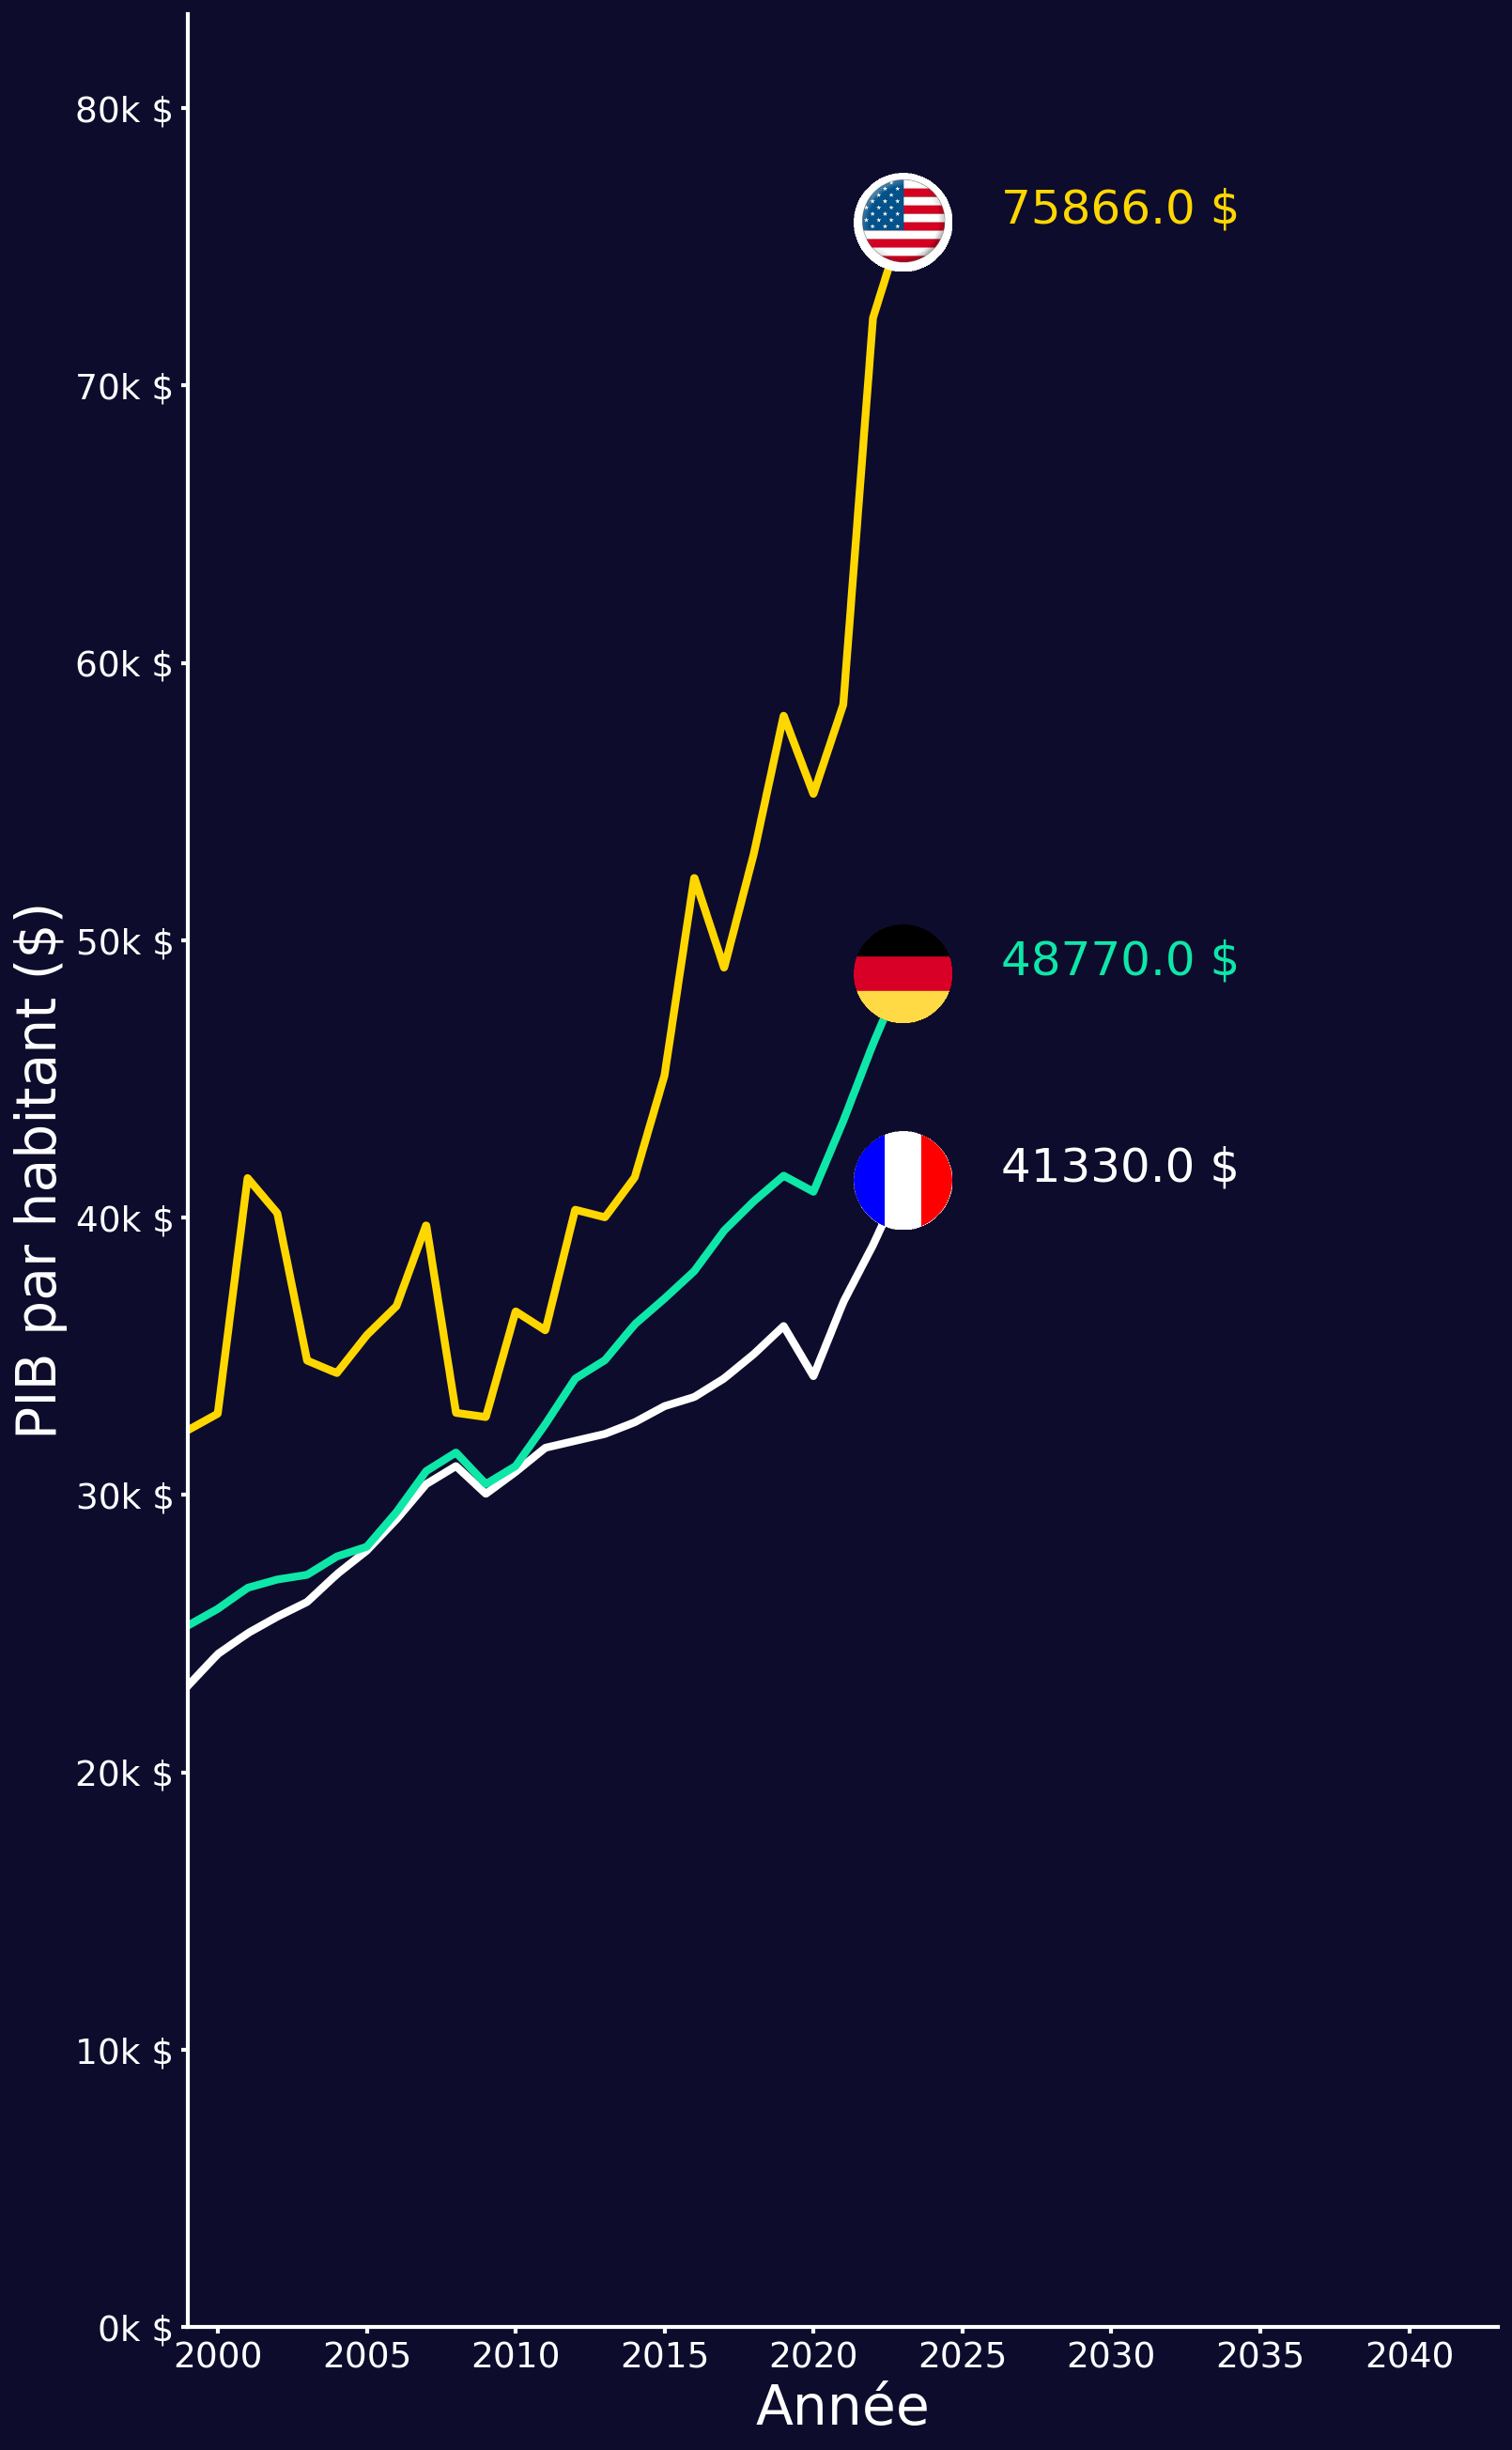

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.dates as mdates
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image, ImageOps, ImageDraw

def circular_mask(image_path, size):
    img = Image.open(image_path).convert("RGBA")
    img = img.resize(size, Image.LANCZOS)

    mask = Image.new("L", img.size, 0)
    draw = ImageDraw.Draw(mask)
    draw.ellipse((0, 0) + img.size, fill=255)

    output = ImageOps.fit(img, mask.size, centering=(0.5, 0.5))
    output.putalpha(mask)

    return output

# Load the CSV file
csv_file_path = "/content/GDP_per_capita_France_Germany_US.csv"
df_gdp = pd.read_csv(csv_file_path)

# Convert the 'Date' column to datetime format
df_gdp['Date'] = pd.to_datetime(df_gdp['Date'].astype(str) + '-01-01')

# Filter data to start from 1999
df_gdp = df_gdp[df_gdp['Date'].dt.year >= 1999]

# Prepare data for interpolation and animation
x_data = df_gdp['Date'].values.astype('datetime64[D]')
total_frames = 15 * 60 * 2  # Double the number of frames for slower animation
time_interp = np.linspace(0, len(x_data) - 1, total_frames)
x_interp = np.interp(time_interp, np.arange(len(x_data)), x_data.astype(np.int64)).astype('datetime64[D]')
y_interp_france = np.interp(time_interp, np.arange(len(df_gdp)), df_gdp['PIB par habitant (France)'])
y_interp_germany = np.interp(time_interp, np.arange(len(df_gdp)), df_gdp['PIB par habitant (Germany)'])
y_interp_us = np.interp(time_interp, np.arange(len(df_gdp)), df_gdp['PIB par habitant (US)'])

# Load and transform flag images
flag_france = circular_mask("/content/drapeau_france.png", (200, 200))
flag_germany = circular_mask("/content/drapeau_allemagne.png", (200, 200))
flag_us = circular_mask("/content/drapeau_usa.png", (200, 200))

# Convert PIL images to numpy arrays
flag_france = np.array(flag_france)
flag_germany = np.array(flag_germany)
flag_us = np.array(flag_us)

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 21.33), dpi=150)

# Background color
fig.patch.set_facecolor('#0D0C2D')
ax1.set_facecolor('#0D0C2D')

# Remove top and right frames
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Configure the x-axis to show years every 5 years
ax1.xaxis.set_major_locator(mdates.YearLocator(5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Line colors
color_france = 'white'
color_germany = '#0EE7A8'
color_us = '#FFD700'

# Set axis and label colors to white and thicken the axes
ax1.spines['left'].set_color('white')
ax1.spines['bottom'].set_color('white')
ax1.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.tick_params(axis='x', colors='white', labelsize=18, width=2)
ax1.tick_params(axis='y', colors='white', labelsize=18, width=2)
ax1.yaxis.label.set_color('white')
ax1.xaxis.label.set_color('white')

# Format y-axis to show values in thousands of dollars
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1000)}k $'))

# Create the data lines with increased thickness
line_france, = ax1.plot([], [], label='France', lw=4, color=color_france)
line_germany, = ax1.plot([], [], label='Germany', lw=4, color=color_germany)
line_us, = ax1.plot([], [], label='US', lw=4, color=color_us)

# Initialize the function for setting up the animation
def init():
    line_france.set_data([], [])
    line_germany.set_data([], [])
    line_us.set_data([], [])
    ax1.set_xlim(x_interp.min(), x_interp.max() + np.timedelta64(3652, 'D') * 3)  # Further increased right margin
    ax1.set_ylim(0, max(y_interp_france.max(), y_interp_germany.max(), np.nanmax(y_interp_us)) * 1.1)
    ax1.set_xlabel('Année', fontsize=28)
    ax1.set_ylabel('PIB par habitant ($)', fontsize=28, color='white')
    return line_france, line_germany, line_us

# Function to check and avoid overlap of annotations
def avoid_overlap(ann_france, ann_germany):
    return abs(ann_france.xy[1] - ann_germany.xy[1]) < 600  # Greatly increased sensitivity

# Function to update the animation
def update(frame):
    # Update the data lines
    line_france.set_data(x_interp[:frame], y_interp_france[:frame])
    line_germany.set_data(x_interp[:frame], y_interp_germany[:frame])
    line_us.set_data(x_interp[:frame], y_interp_us[:frame])

    # Update the axis limits if the sequence is not empty
    if frame > 0:
        current_max = max(
            np.nanmax(y_interp_france[:frame]),
            np.nanmax(y_interp_germany[:frame]),
            np.nanmax(y_interp_us[:frame])
        ) * 1.1
        ax1.set_ylim(0, current_max)
        range_x = x_interp.max() - x_interp.min()
        ax1.set_xlim(x_interp[0], x_interp[0] + range_x * (frame / total_frames) + np.timedelta64(3652, 'D') * 2)

        for ann in ax1.texts:
            ann.remove()
        for artist in ax1.artists:
            artist.remove()

        # Add annotations
        ann_france = ax1.annotate(
            f"{y_interp_france[frame]:.1f} $", (x_interp[frame], y_interp_france[frame]),
            textcoords="offset points", xytext=(50, 0), ha='left',  # Closer to the right
            color=color_france, fontsize=24
        )
        ann_germany = ax1.annotate(
            f"{y_interp_germany[frame]:.1f} $", (x_interp[frame], y_interp_germany[frame]),
            textcoords="offset points", xytext=(50, 0), ha='left',  # Closer to the right
            color=color_germany, fontsize=24
        )
        ann_us = ax1.annotate(
            f"{y_interp_us[frame]:.1f} $", (x_interp[frame], y_interp_us[frame]),
            textcoords="offset points", xytext=(50, 0), ha='left',  # Closer to the right
            color=color_us, fontsize=24
        )

        # Check and adjust for overlap between France and Germany annotations
        if avoid_overlap(ann_france, ann_germany):
            ann_germany.remove()
            ann_germany = ax1.annotate(
                f"{y_interp_germany[frame]:.1f} $", (x_interp[frame], y_interp_germany[frame] + 1200),  # Greatly increased vertical offset
                textcoords="offset points", xytext=(50, 0), ha='left',  # Adjusting the vertical offset
                color=color_germany, fontsize=24
            )

        # Add flag images
        flag_france_image = OffsetImage(flag_france, zoom=0.25)  # Adjusted zoom for 200x200 size
        flag_germany_image = OffsetImage(flag_germany, zoom=0.25)  # Adjusted zoom for 200x200 size
        flag_us_image = OffsetImage(flag_us, zoom=0.25)  # Adjusted zoom for 200x200 size

        flag_france_annot = AnnotationBbox(flag_france_image, (x_interp[frame], y_interp_france[frame]), frameon=False)
        flag_germany_annot = AnnotationBbox(flag_germany_image, (x_interp[frame], y_interp_germany[frame] + (1200 if avoid_overlap(ann_france, ann_germany) else 0)), frameon=False)
        flag_us_annot = AnnotationBbox(flag_us_image, (x_interp[frame], y_interp_us[frame]), frameon=False)

        ax1.add_artist(flag_france_annot)
        ax1.add_artist(flag_germany_annot)
        ax1.add_artist(flag_us_annot)

    return line_france, line_germany, line_us

# Create the animation with 30 frames per second (interval=1000/30 milliseconds)
ani = FuncAnimation(fig, update, frames=total_frames, init_func=init, blit=True, interval=1000/30, repeat=False)

# Save the animation as a video file
ani.save('gdp_animation.mp4', writer='ffmpeg')

# Display the animation in the notebook
HTML('<video controls src="gdp_animation.mp4" type="video/mp4">')


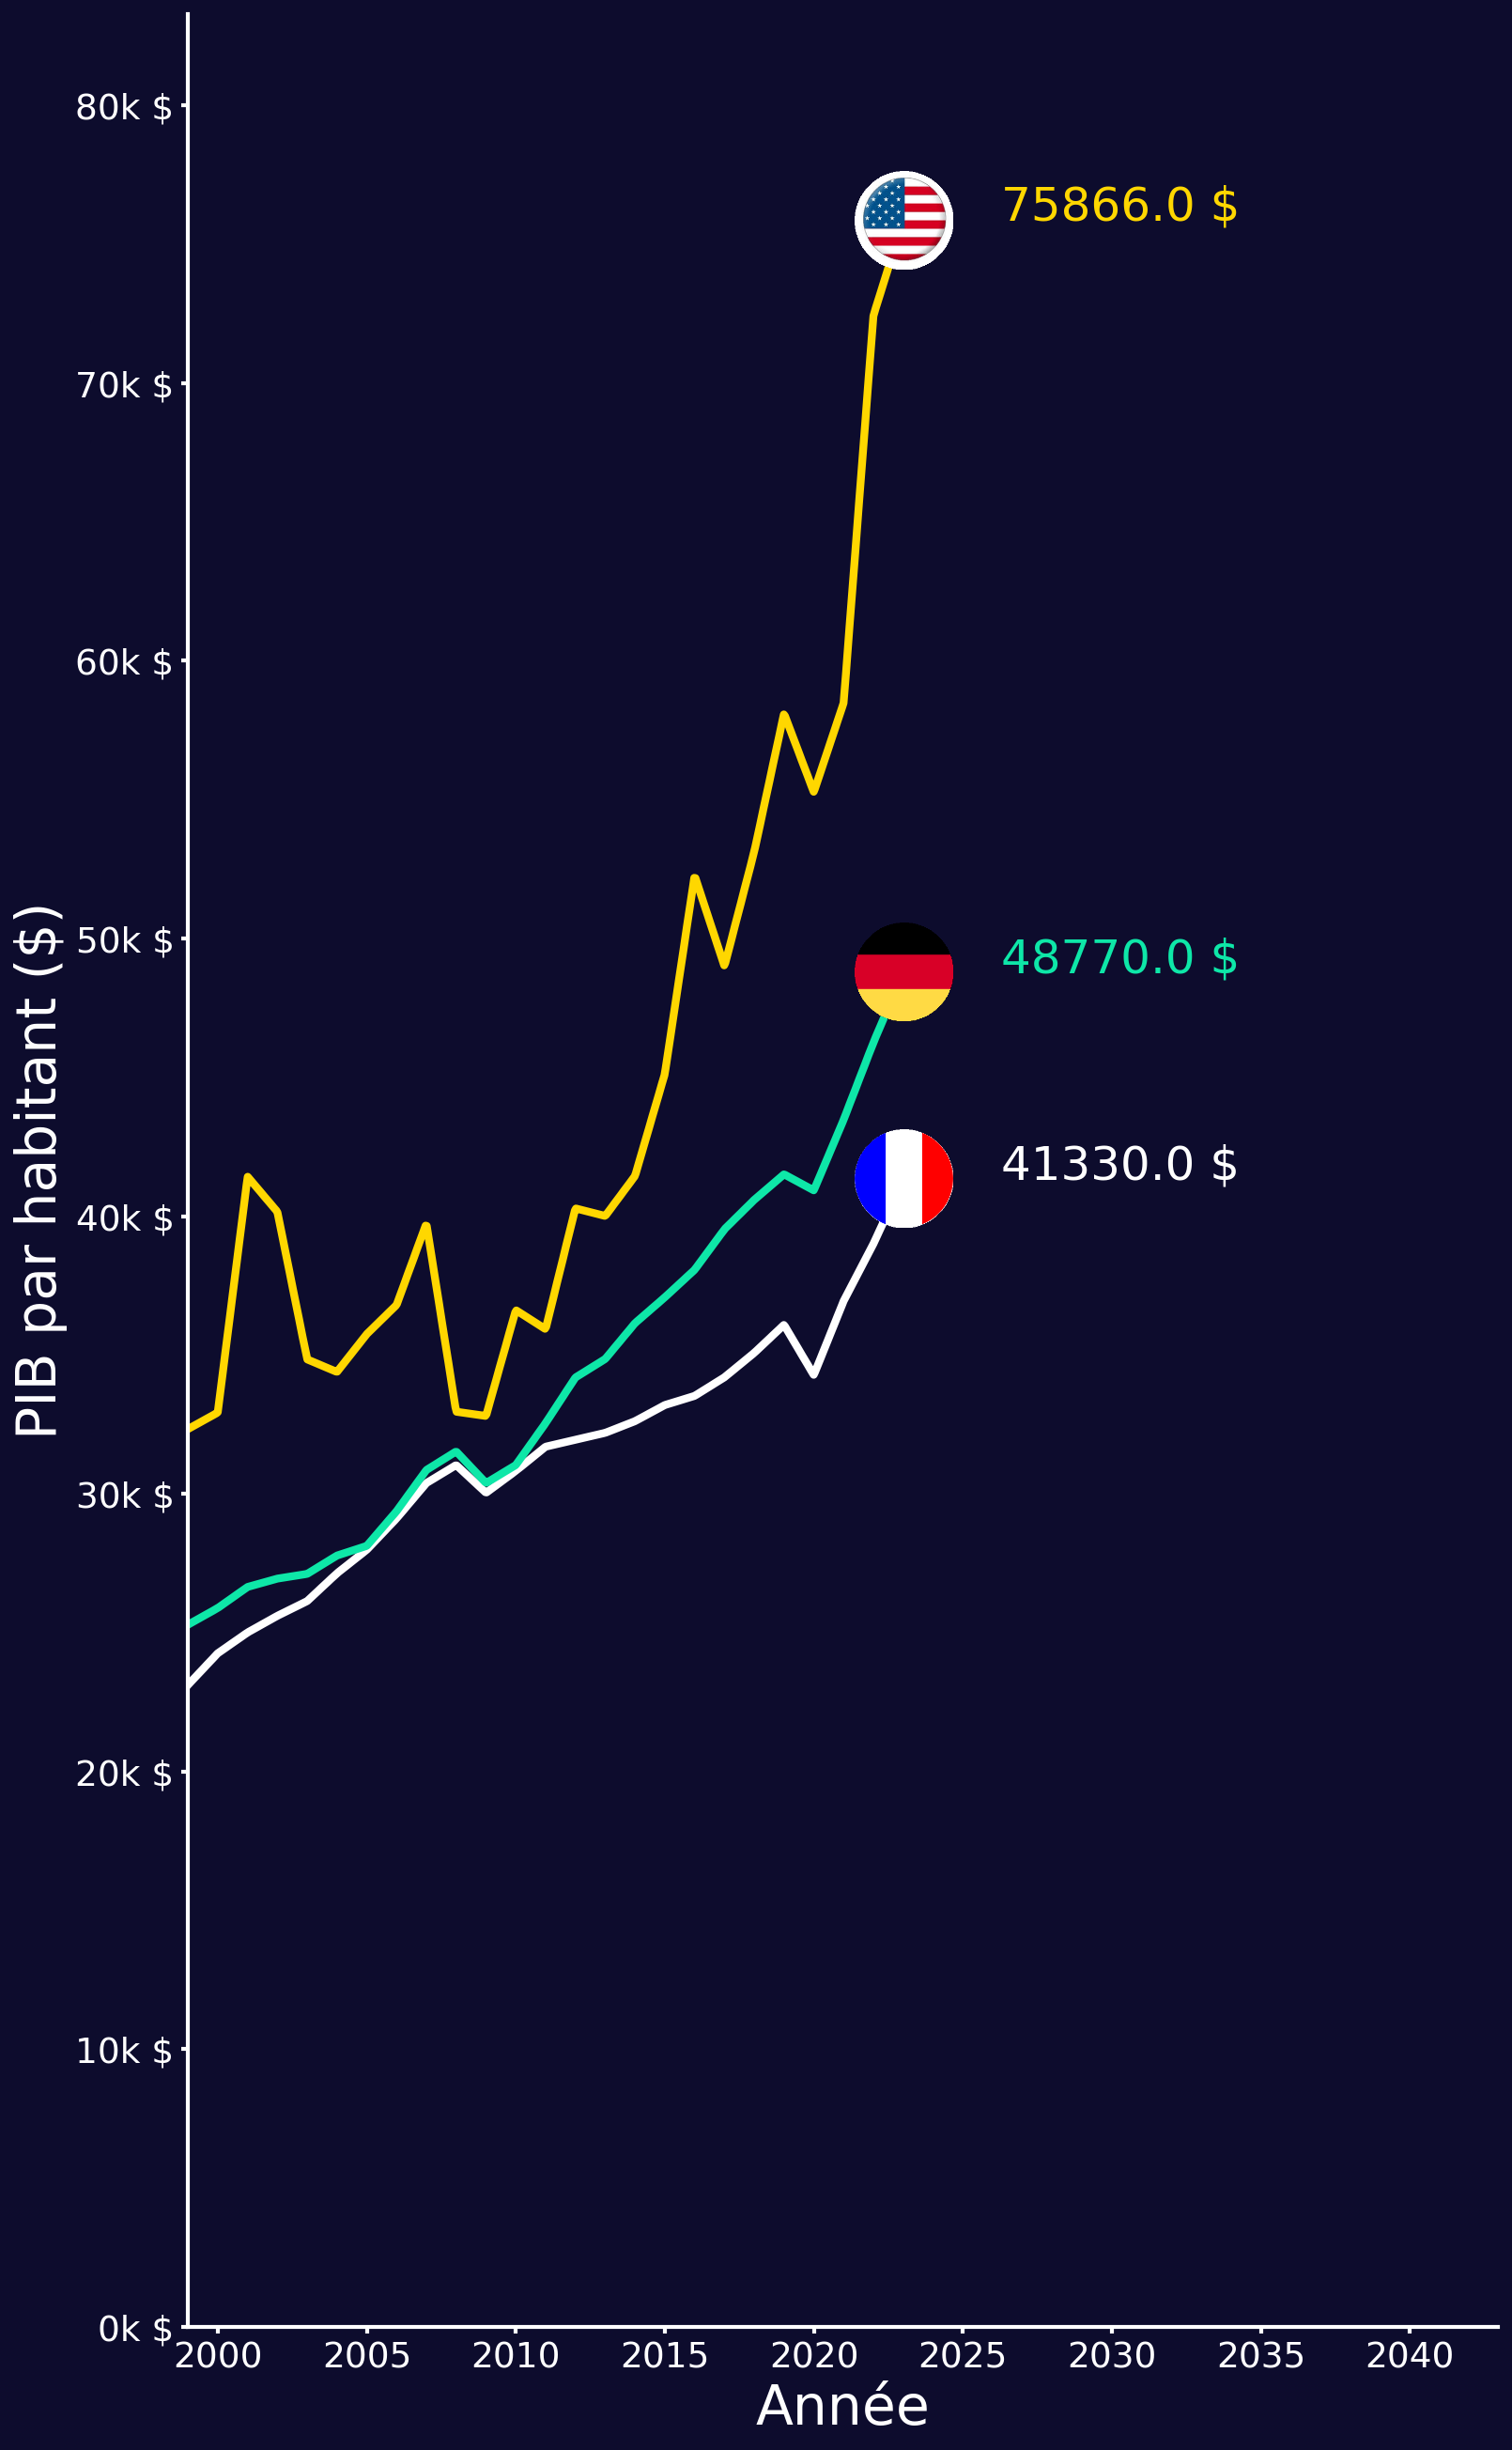

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.dates as mdates
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image, ImageOps, ImageDraw

def circular_mask(image_path, size):
    img = Image.open(image_path).convert("RGBA")
    img = img.resize(size, Image.LANCZOS)

    mask = Image.new("L", img.size, 0)
    draw = ImageDraw.Draw(mask)
    draw.ellipse((0, 0) + img.size, fill=255)

    output = ImageOps.fit(img, mask.size, centering=(0.5, 0.5))
    output.putalpha(mask)

    return output

# Load the CSV file
csv_file_path = "/content/GDP_per_capita_France_Germany_US.csv"
df_gdp = pd.read_csv(csv_file_path)

# Convert the 'Date' column to datetime format
df_gdp['Date'] = pd.to_datetime(df_gdp['Date'].astype(str) + '-01-01')

# Filter data to start from 1999
df_gdp = df_gdp[df_gdp['Date'].dt.year >= 1999]

# Prepare data for interpolation and animation
x_data = df_gdp['Date'].values.astype('datetime64[D]')
total_frames = 20 * 30  # 20 seconds at 30 frames per second
time_interp = np.linspace(0, len(x_data) - 1, total_frames)
x_interp = np.interp(time_interp, np.arange(len(x_data)), x_data.astype(np.int64)).astype('datetime64[D]')
y_interp_france = np.interp(time_interp, np.arange(len(df_gdp)), df_gdp['PIB par habitant (France)'])
y_interp_germany = np.interp(time_interp, np.arange(len(df_gdp)), df_gdp['PIB par habitant (Germany)'])
y_interp_us = np.interp(time_interp, np.arange(len(df_gdp)), df_gdp['PIB par habitant (US)'])

# Load and transform flag images
flag_france = circular_mask("/content/drapeau_france.png", (200, 200))
flag_germany = circular_mask("/content/drapeau_allemagne.png", (200, 200))
flag_us = circular_mask("/content/drapeau_usa.png", (200, 200))

# Convert PIL images to numpy arrays
flag_france = np.array(flag_france)
flag_germany = np.array(flag_germany)
flag_us = np.array(flag_us)

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 21.33), dpi=150)

# Background color
fig.patch.set_facecolor('#0D0C2D')
ax1.set_facecolor('#0D0C2D')

# Remove top and right frames
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Configure the x-axis to show years every 5 years
ax1.xaxis.set_major_locator(mdates.YearLocator(5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Line colors
color_france = 'white'
color_germany = '#0EE7A8'
color_us = '#FFD700'

# Set axis and label colors to white and thicken the axes
ax1.spines['left'].set_color('white')
ax1.spines['bottom'].set_color('white')
ax1.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.tick_params(axis='x', colors='white', labelsize=18, width=2)
ax1.tick_params(axis='y', colors='white', labelsize=18, width=2)
ax1.yaxis.label.set_color('white')
ax1.xaxis.label.set_color('white')

# Format y-axis to show values in thousands of dollars
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1000)}k $'))

# Create the data lines with increased thickness
line_france, = ax1.plot([], [], label='France', lw=4, color=color_france)
line_germany, = ax1.plot([], [], label='Germany', lw=4, color=color_germany)
line_us, = ax1.plot([], [], label='US', lw=4, color=color_us)

# Initialize the function for setting up the animation
def init():
    line_france.set_data([], [])
    line_germany.set_data([], [])
    line_us.set_data([], [])
    ax1.set_xlim(x_interp.min(), x_interp.max() + np.timedelta64(3652, 'D') * 3)  # Further increased right margin
    ax1.set_ylim(0, max(y_interp_france.max(), y_interp_germany.max(), np.nanmax(y_interp_us)) * 1.1)
    ax1.set_xlabel('Année', fontsize=28)
    ax1.set_ylabel('PIB par habitant ($)', fontsize=28, color='white')
    return line_france, line_germany, line_us

# Function to check and avoid overlap of annotations
def avoid_overlap(ann_france, ann_germany):
    return abs(ann_france.xy[1] - ann_germany.xy[1]) < 600  # Greatly increased sensitivity

# Function to update the animation
def update(frame):
    # Update the data lines
    line_france.set_data(x_interp[:frame], y_interp_france[:frame])
    line_germany.set_data(x_interp[:frame], y_interp_germany[:frame])
    line_us.set_data(x_interp[:frame], y_interp_us[:frame])

    # Update the axis limits if the sequence is not empty
    if frame > 0:
        current_max = max(
            np.nanmax(y_interp_france[:frame]),
            np.nanmax(y_interp_germany[:frame]),
            np.nanmax(y_interp_us[:frame])
        ) * 1.1
        ax1.set_ylim(0, current_max)
        range_x = x_interp.max() - x_interp.min()
        ax1.set_xlim(x_interp[0], x_interp[0] + range_x * (frame / total_frames) + np.timedelta64(3652, 'D') * 2)

        for ann in ax1.texts:
            ann.remove()
        for artist in ax1.artists:
            artist.remove()

        # Add annotations
        ann_france = ax1.annotate(
            f"{y_interp_france[frame]:.1f} $", (x_interp[frame], y_interp_france[frame]),
            textcoords="offset points", xytext=(50, 0), ha='left',  # Closer to the right
            color=color_france, fontsize=24
        )
        ann_germany = ax1.annotate(
            f"{y_interp_germany[frame]:.1f} $", (x_interp[frame], y_interp_germany[frame]),
            textcoords="offset points", xytext=(50, 0), ha='left',  # Closer to the right
            color=color_germany, fontsize=24
        )
        ann_us = ax1.annotate(
            f"{y_interp_us[frame]:.1f} $", (x_interp[frame], y_interp_us[frame]),
            textcoords="offset points", xytext=(50, 0), ha='left',  # Closer to the right
            color=color_us, fontsize=24
        )

        # Check and adjust for overlap between France and Germany annotations
        if avoid_overlap(ann_france, ann_germany):
            ann_germany.remove()
            ann_germany = ax1.annotate(
                f"{y_interp_germany[frame]:.1f} $", (x_interp[frame], y_interp_germany[frame] + 1200),  # Greatly increased vertical offset
                textcoords="offset points", xytext=(50, 0), ha='left',  # Adjusting the vertical offset
                color=color_germany, fontsize=24
            )

        # Add flag images
        flag_france_image = OffsetImage(flag_france, zoom=0.25)  # Adjusted zoom for 200x200 size
        flag_germany_image = OffsetImage(flag_germany, zoom=0.25)  # Adjusted zoom for 200x200 size
        flag_us_image = OffsetImage(flag_us, zoom=0.25)  # Adjusted zoom for 200x200 size

        flag_france_annot = AnnotationBbox(flag_france_image, (x_interp[frame], y_interp_france[frame]), frameon=False)
        flag_germany_annot = AnnotationBbox(flag_germany_image, (x_interp[frame], y_interp_germany[frame] + (1200 if avoid_overlap(ann_france, ann_germany) else 0)), frameon=False)
        flag_us_annot = AnnotationBbox(flag_us_image, (x_interp[frame], y_interp_us[frame]), frameon=False)

        ax1.add_artist(flag_france_annot)
        ax1.add_artist(flag_germany_annot)
        ax1.add_artist(flag_us_annot)

    return line_france, line_germany, line_us

# Create the animation with 30 frames per second (interval=1000/30 milliseconds)
ani = FuncAnimation(fig, update, frames=total_frames, init_func=init, blit=True, interval=1000/30, repeat=False)

# Save the animation as a video file
ani.save('gdp_animation.mp4', writer='ffmpeg')

# Display the animation in the notebook
HTML('<video controls src="gdp_animation.mp4" type="video/mp4">')


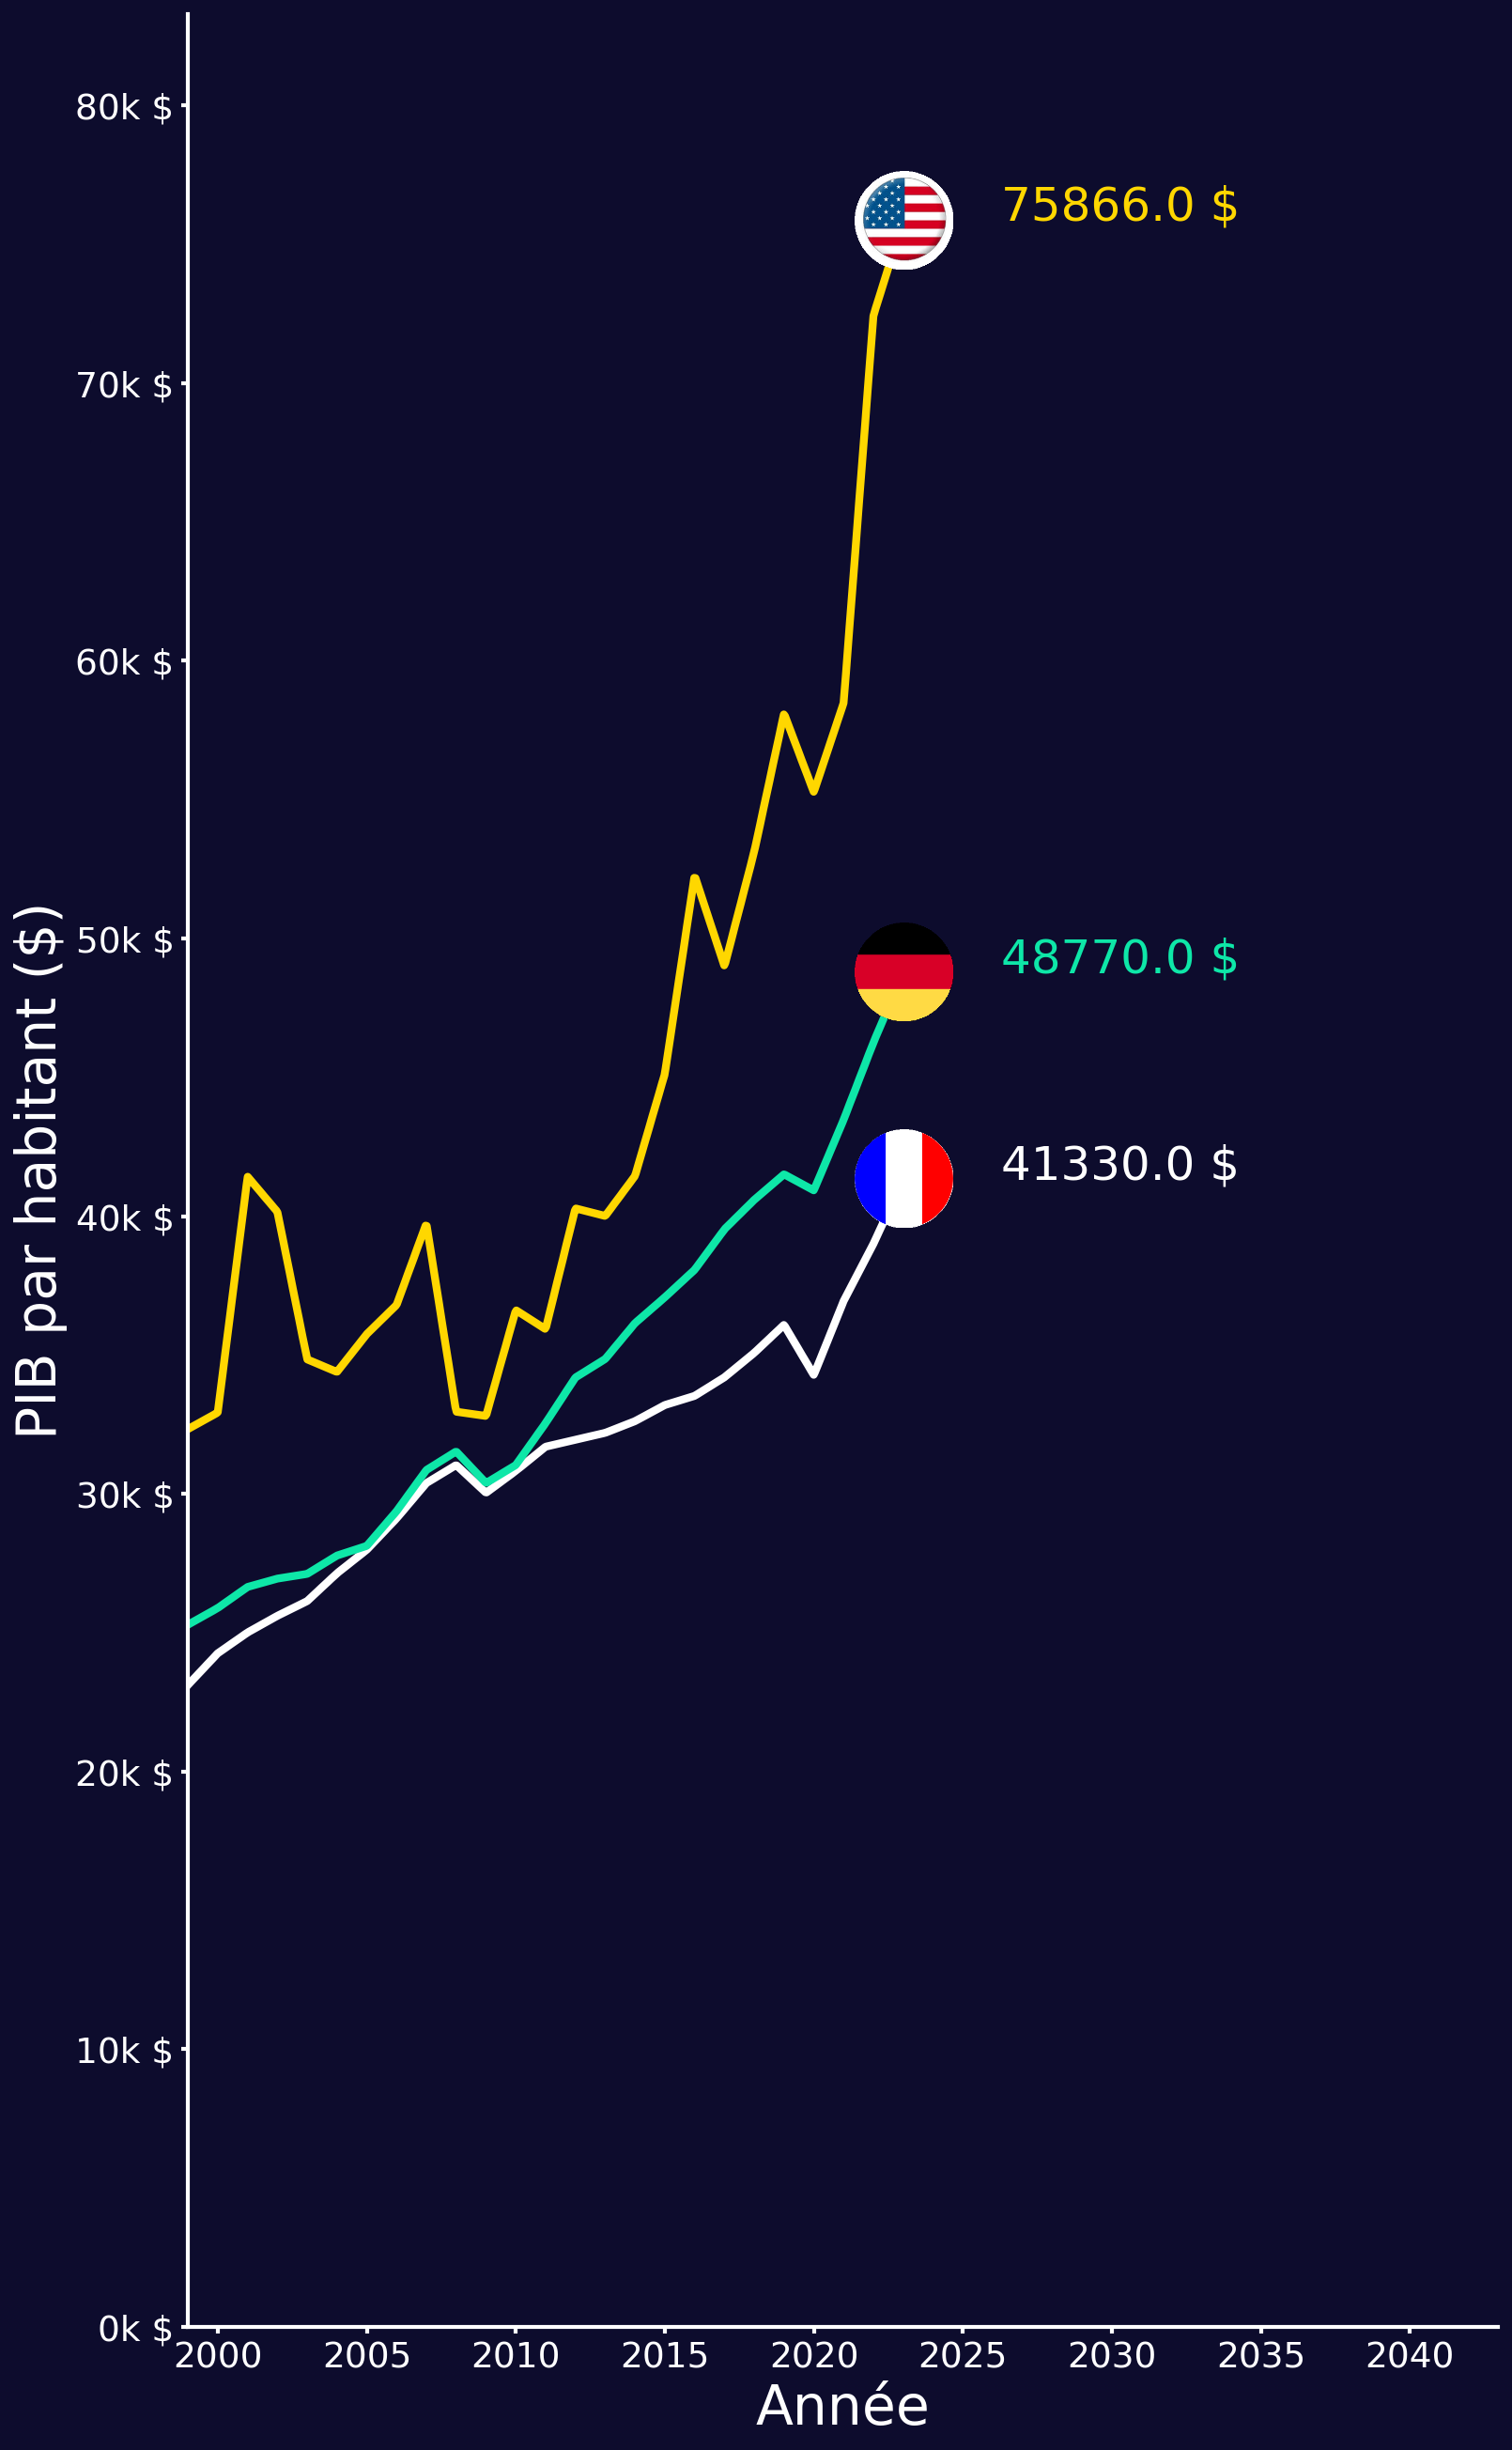

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.dates as mdates
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image, ImageOps, ImageDraw

def circular_mask(image_path, size):
    img = Image.open(image_path).convert("RGBA")
    img = img.resize(size, Image.LANCZOS)

    mask = Image.new("L", img.size, 0)
    draw = ImageDraw.Draw(mask)
    draw.ellipse((0, 0) + img.size, fill=255)

    output = ImageOps.fit(img, mask.size, centering=(0.5, 0.5))
    output.putalpha(mask)

    return output

# Load the CSV file
csv_file_path = "/content/GDP_per_capita_France_Germany_US.csv"
df_gdp = pd.read_csv(csv_file_path)

# Convert the 'Date' column to datetime format
df_gdp['Date'] = pd.to_datetime(df_gdp['Date'].astype(str) + '-01-01')

# Filter data to start from 1999
df_gdp = df_gdp[df_gdp['Date'].dt.year >= 1999]

# Prepare data for interpolation and animation
x_data = df_gdp['Date'].values.astype('datetime64[D]')
total_frames = 20 * 30  # 20 seconds at 30 frames per second
time_interp = np.linspace(0, len(x_data) - 1, total_frames)
x_interp = np.interp(time_interp, np.arange(len(x_data)), x_data.astype(np.int64)).astype('datetime64[D]')
y_interp_france = np.interp(time_interp, np.arange(len(df_gdp)), df_gdp['PIB par habitant (France)'])
y_interp_germany = np.interp(time_interp, np.arange(len(df_gdp)), df_gdp['PIB par habitant (Germany)'])
y_interp_us = np.interp(time_interp, np.arange(len(df_gdp)), df_gdp['PIB par habitant (US)'])

# Load and transform flag images
flag_france = circular_mask("/content/drapeau_france.png", (200, 200))
flag_germany = circular_mask("/content/drapeau_allemagne.png", (200, 200))
flag_us = circular_mask("/content/drapeau_usa.png", (200, 200))

# Convert PIL images to numpy arrays
flag_france = np.array(flag_france)
flag_germany = np.array(flag_germany)
flag_us = np.array(flag_us)

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 21.33), dpi=150)

# Background color
fig.patch.set_facecolor('#0D0C2D')
ax1.set_facecolor('#0D0C2D')

# Remove top and right frames
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Configure the x-axis to show years every 5 years
ax1.xaxis.set_major_locator(mdates.YearLocator(5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Line colors
color_france = 'white'
color_germany = '#0EE7A8'
color_us = '#FFD700'

# Set axis and label colors to white and thicken the axes
ax1.spines['left'].set_color('white')
ax1.spines['bottom'].set_color('white')
ax1.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.tick_params(axis='x', colors='white', labelsize=18, width=2)
ax1.tick_params(axis='y', colors='white', labelsize=18, width=2)
ax1.yaxis.label.set_color('white')
ax1.xaxis.label.set_color('white')

# Format y-axis to show values in thousands of dollars
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1000)}k $'))

# Create the data lines with increased thickness
line_france, = ax1.plot([], [], label='France', lw=4, color=color_france)
line_germany, = ax1.plot([], [], label='Germany', lw=4, color=color_germany)
line_us, = ax1.plot([], [], label='US', lw=4, color=color_us)

# Initialize the function for setting up the animation
def init():
    line_france.set_data([], [])
    line_germany.set_data([], [])
    line_us.set_data([], [])
    ax1.set_xlim(x_interp.min(), x_interp.max() + np.timedelta64(3652, 'D') * 3)  # Further increased right margin
    ax1.set_ylim(0, max(y_interp_france.max(), y_interp_germany.max(), np.nanmax(y_interp_us)) * 1.1)
    ax1.set_xlabel('Année', fontsize=28)
    ax1.set_ylabel('PIB par habitant ($)', fontsize=28, color='white')
    return line_france, line_germany, line_us

# Function to check and avoid overlap of annotations
def avoid_overlap(ann1, ann2):
    return abs(ann1.xy[1] - ann2.xy[1]) < 600  # Greatly increased sensitivity

# Function to update the animation
def update(frame):
    # Update the data lines
    line_france.set_data(x_interp[:frame], y_interp_france[:frame])
    line_germany.set_data(x_interp[:frame], y_interp_germany[:frame])
    line_us.set_data(x_interp[:frame], y_interp_us[:frame])

    # Update the axis limits if the sequence is not empty
    if frame > 0:
        current_max = max(
            np.nanmax(y_interp_france[:frame]),
            np.nanmax(y_interp_germany[:frame]),
            np.nanmax(y_interp_us[:frame])
        ) * 1.1
        ax1.set_ylim(0, current_max)
        range_x = x_interp.max() - x_interp.min()
        ax1.set_xlim(x_interp[0], x_interp[0] + range_x * (frame / total_frames) + np.timedelta64(3652, 'D') * 2)

        for ann in ax1.texts:
            ann.remove()
        for artist in ax1.artists:
            artist.remove()

        # Add annotations
        ann_france = ax1.annotate(
            f"{y_interp_france[frame]:.1f} $", (x_interp[frame], y_interp_france[frame]),
            textcoords="offset points", xytext=(50, 0), ha='left',  # Closer to the right
            color=color_france, fontsize=24
        )
        ann_germany = ax1.annotate(
            f"{y_interp_germany[frame]:.1f} $", (x_interp[frame], y_interp_germany[frame]),
            textcoords="offset points", xytext=(50, 0), ha='left',  # Closer to the right
            color=color_germany, fontsize=24
        )
        ann_us = ax1.annotate(
            f"{y_interp_us[frame]:.1f} $", (x_interp[frame], y_interp_us[frame]),
            textcoords="offset points", xytext=(50, 0), ha='left',  # Closer to the right
            color=color_us, fontsize=24
        )

        # Check and adjust for overlap between France and Germany annotations
        if avoid_overlap(ann_france, ann_germany):
            ann_germany.remove()
            ann_germany = ax1.annotate(
                f"{y_interp_germany[frame]:.1f} $", (x_interp[frame], y_interp_germany[frame] + 1200),  # Greatly increased vertical offset
                textcoords="offset points", xytext=(50, 0), ha='left',  # Adjusting the vertical offset
                color=color_germany, fontsize=24
            )

        # Check and adjust for overlap between US and Germany annotations
        if avoid_overlap(ann_germany, ann_us):
            ann_us.remove()
            ann_us = ax1.annotate(
                f"{y_interp_us[frame]:.1f} $", (x_interp[frame], y_interp_us[frame] + 1200),  # Greatly increased vertical offset
                textcoords="offset points", xytext=(50, 0), ha='left',  # Adjusting the vertical offset
                color=color_us, fontsize=24
            )

        # Add flag images
        flag_france_image = OffsetImage(flag_france, zoom=0.25)  # Adjusted zoom for 200x200 size
        flag_germany_image = OffsetImage(flag_germany, zoom=0.25)  # Adjusted zoom for 200x200 size
        flag_us_image = OffsetImage(flag_us, zoom=0.25)  # Adjusted zoom for 200x200 size

        flag_france_annot = AnnotationBbox(flag_france_image, (x_interp[frame], y_interp_france[frame]), frameon=False)
        flag_germany_annot = AnnotationBbox(flag_germany_image, (x_interp[frame], y_interp_germany[frame]), frameon=False)
        flag_us_annot = AnnotationBbox(flag_us_image, (x_interp[frame], y_interp_us[frame]), frameon=False)

        ax1.add_artist(flag_france_annot)
        ax1.add_artist(flag_germany_annot)
        ax1.add_artist(flag_us_annot)

    return line_france, line_germany, line_us

# Create the animation with 30 frames per second (interval=1000/30 milliseconds)
ani = FuncAnimation(fig, update, frames=total_frames, init_func=init, blit=True, interval=1000/30, repeat=False)

# Save the animation as a video file
ani.save('gdp_animation.mp4', writer='ffmpeg')

# Display the animation in the notebook
HTML('<video controls src="gdp_animation.mp4" type="video/mp4">')


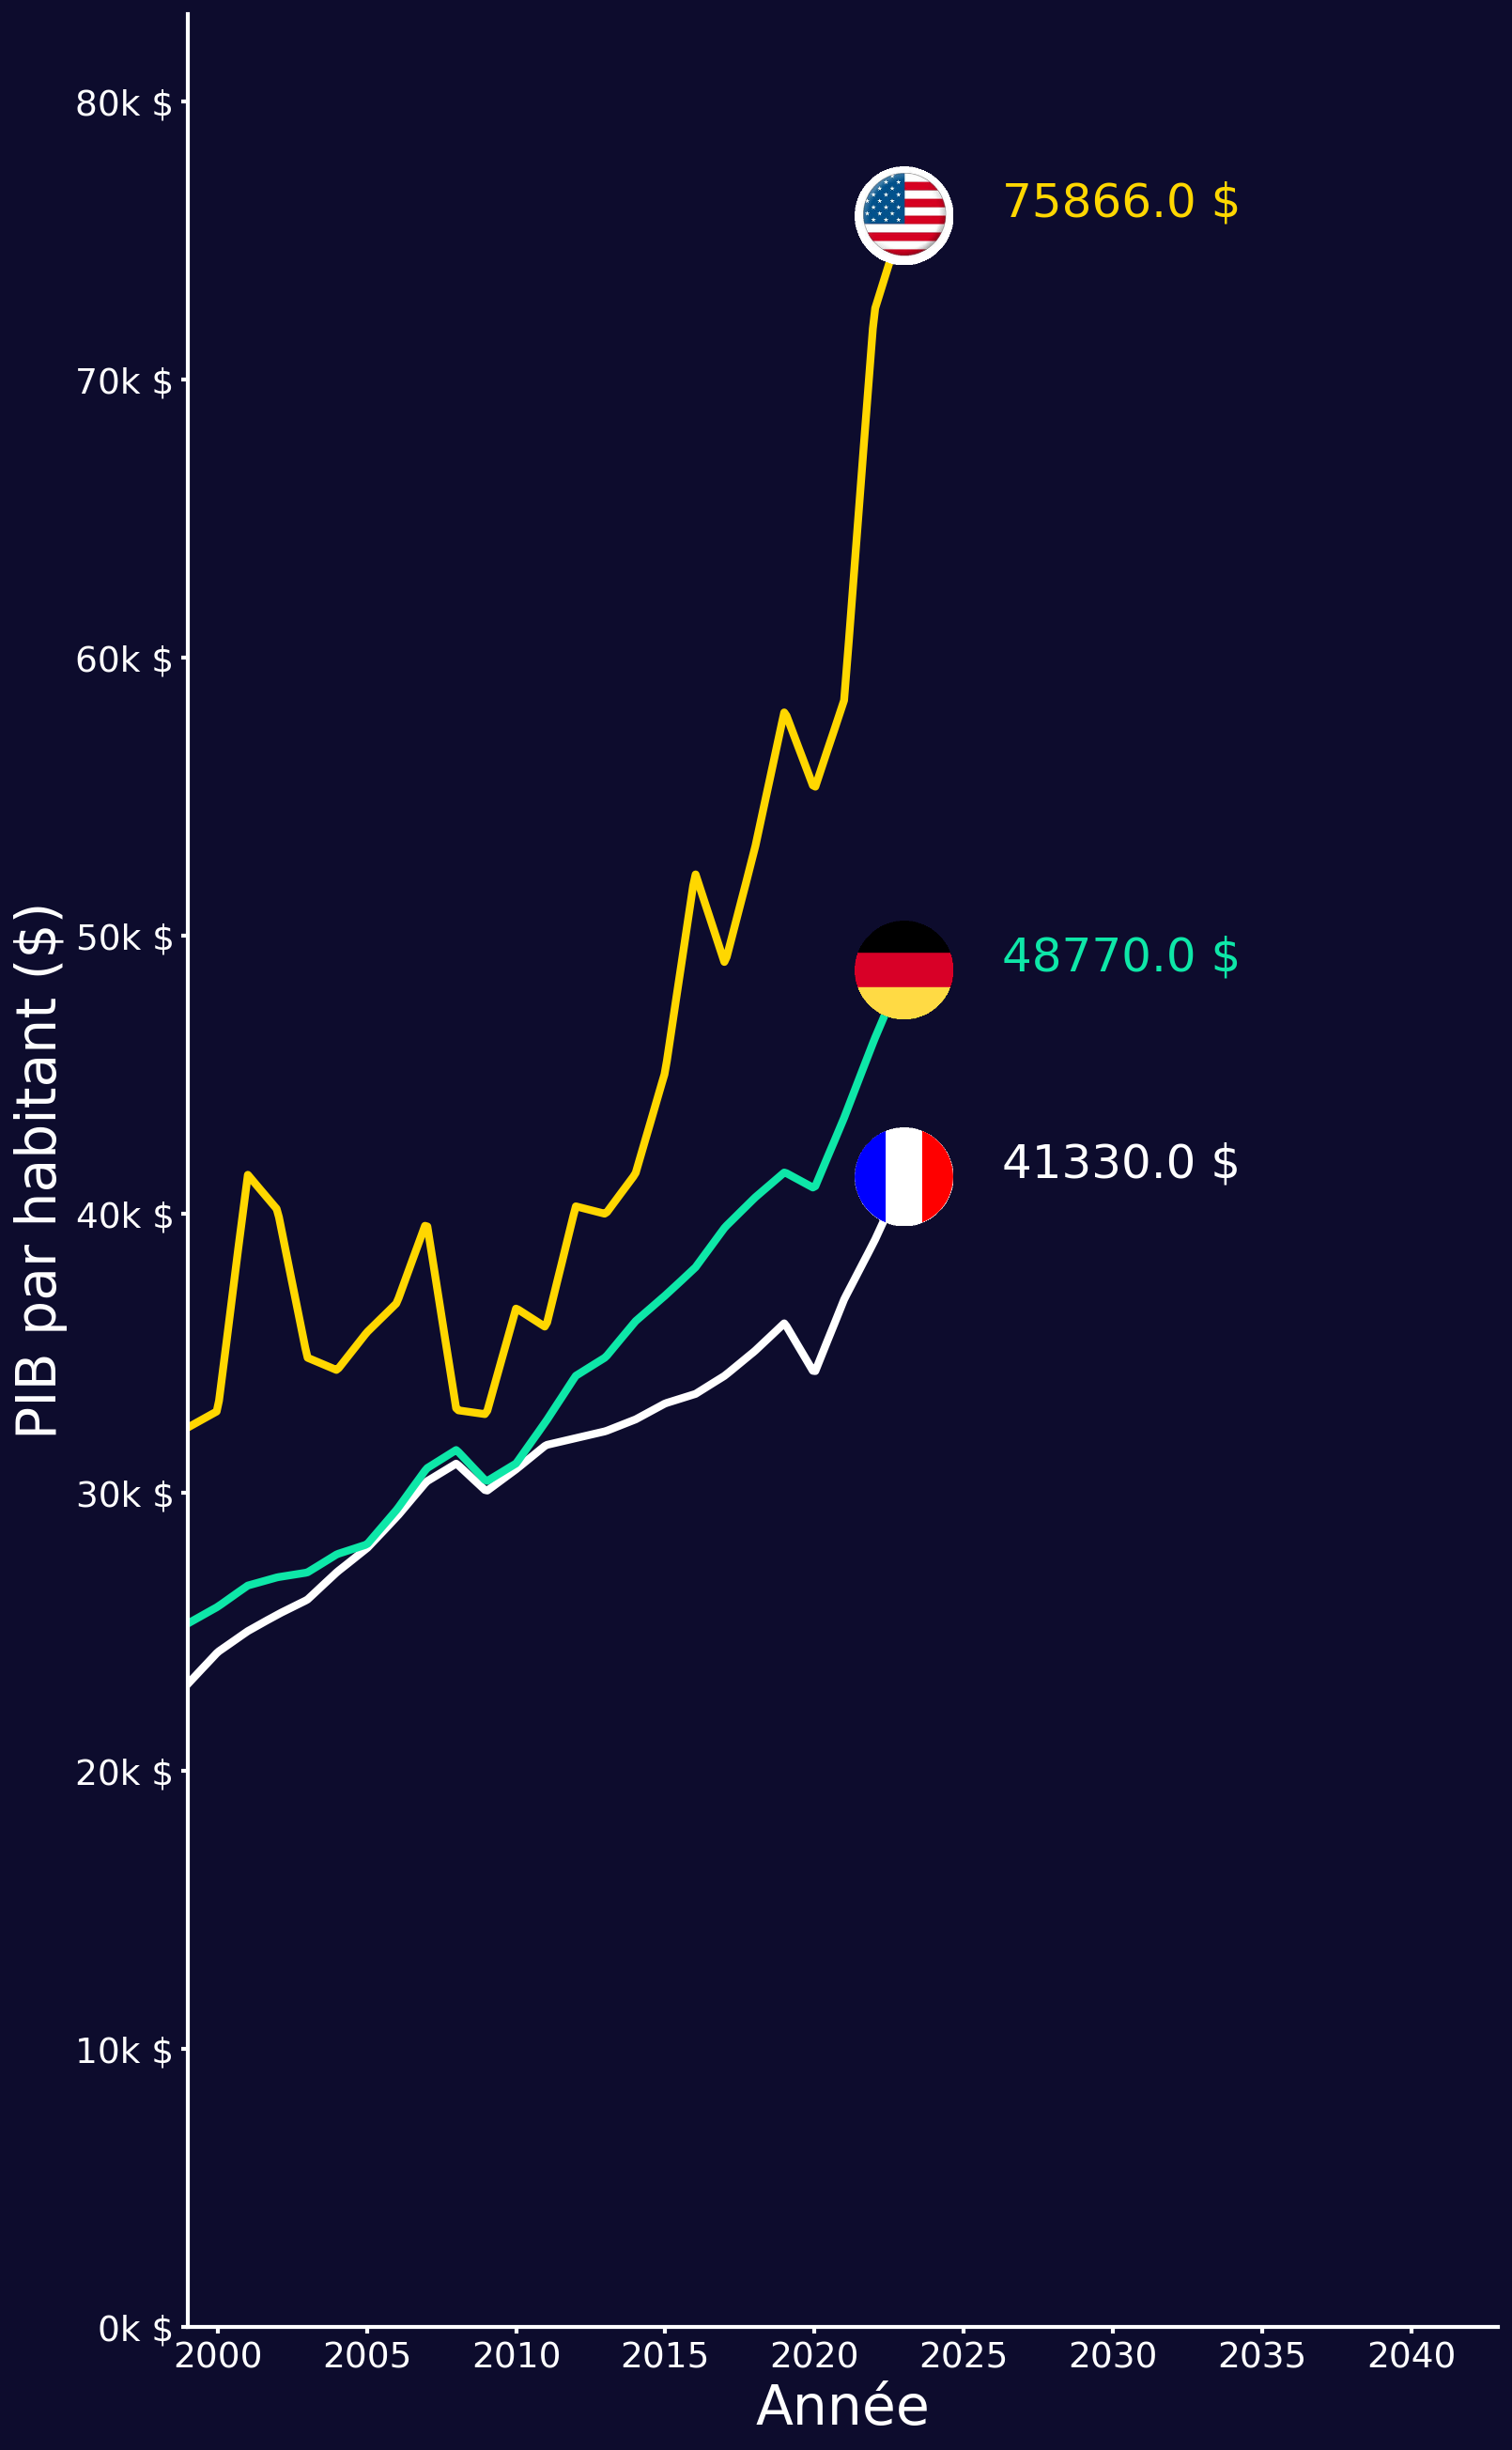

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.dates as mdates
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image, ImageOps, ImageDraw

def circular_mask(image_path, size):
    img = Image.open(image_path).convert("RGBA")
    img = img.resize(size, Image.LANCZOS)

    mask = Image.new("L", img.size, 0)
    draw = ImageDraw.Draw(mask)
    draw.ellipse((0, 0) + img.size, fill=255)

    output = ImageOps.fit(img, mask.size, centering=(0.5, 0.5))
    output.putalpha(mask)

    return output

# Load the CSV file
csv_file_path = "/content/GDP_per_capita_France_Germany_US.csv"
df_gdp = pd.read_csv(csv_file_path)

# Convert the 'Date' column to datetime format
df_gdp['Date'] = pd.to_datetime(df_gdp['Date'].astype(str) + '-01-01')

# Filter data to start from 1999
df_gdp = df_gdp[df_gdp['Date'].dt.year >= 1999]

# Prepare data for interpolation and animation
x_data = df_gdp['Date'].values.astype('datetime64[D]')
total_frames = 10 * 30  # 10 seconds at 30 frames per second
time_interp = np.linspace(0, len(x_data) - 1, total_frames)
x_interp = np.interp(time_interp, np.arange(len(x_data)), x_data.astype(np.int64)).astype('datetime64[D]')
y_interp_france = np.interp(time_interp, np.arange(len(df_gdp)), df_gdp['PIB par habitant (France)'])
y_interp_germany = np.interp(time_interp, np.arange(len(df_gdp)), df_gdp['PIB par habitant (Germany)'])
y_interp_us = np.interp(time_interp, np.arange(len(df_gdp)), df_gdp['PIB par habitant (US)'])

# Load and transform flag images
flag_france = circular_mask("/content/drapeau_france.png", (200, 200))
flag_germany = circular_mask("/content/drapeau_allemagne.png", (200, 200))
flag_us = circular_mask("/content/drapeau_usa.png", (200, 200))

# Convert PIL images to numpy arrays
flag_france = np.array(flag_france)
flag_germany = np.array(flag_germany)
flag_us = np.array(flag_us)

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 21.33), dpi=150)

# Background color
fig.patch.set_facecolor('#0D0C2D')
ax1.set_facecolor('#0D0C2D')

# Remove top and right frames
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Configure the x-axis to show years every 5 years
ax1.xaxis.set_major_locator(mdates.YearLocator(5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Line colors
color_france = 'white'
color_germany = '#0EE7A8'
color_us = '#FFD700'

# Set axis and label colors to white and thicken the axes
ax1.spines['left'].set_color('white')
ax1.spines['bottom'].set_color('white')
ax1.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.tick_params(axis='x', colors='white', labelsize=18, width=2)
ax1.tick_params(axis='y', colors='white', labelsize=18, width=2)
ax1.yaxis.label.set_color('white')
ax1.xaxis.label.set_color('white')

# Format y-axis to show values in thousands of dollars
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1000)}k $'))

# Create the data lines with increased thickness
line_france, = ax1.plot([], [], label='France', lw=4, color=color_france)
line_germany, = ax1.plot([], [], label='Germany', lw=4, color=color_germany)
line_us, = ax1.plot([], [], label='US', lw=4, color=color_us)

# Initialize the function for setting up the animation
def init():
    line_france.set_data([], [])
    line_germany.set_data([], [])
    line_us.set_data([], [])
    ax1.set_xlim(x_interp.min(), x_interp.max() + np.timedelta64(3652, 'D') * 3)  # Further increased right margin
    ax1.set_ylim(0, max(y_interp_france.max(), y_interp_germany.max(), np.nanmax(y_interp_us)) * 1.1)
    ax1.set_xlabel('Année', fontsize=28)
    ax1.set_ylabel('PIB par habitant ($)', fontsize=28, color='white')
    return line_france, line_germany, line_us

# Function to check and avoid overlap of annotations
def avoid_overlap(ann1, ann2):
    return abs(ann1.xy[1] - ann2.xy[1]) < 600  # Greatly increased sensitivity

# Function to update the animation
def update(frame):
    # Update the data lines
    line_france.set_data(x_interp[:frame], y_interp_france[:frame])
    line_germany.set_data(x_interp[:frame], y_interp_germany[:frame])
    line_us.set_data(x_interp[:frame], y_interp_us[:frame])

    # Update the axis limits if the sequence is not empty
    if frame > 0:
        current_max = max(
            np.nanmax(y_interp_france[:frame]),
            np.nanmax(y_interp_germany[:frame]),
            np.nanmax(y_interp_us[:frame])
        ) * 1.1
        ax1.set_ylim(0, current_max)
        range_x = x_interp.max() - x_interp.min()
        ax1.set_xlim(x_interp[0], x_interp[0] + range_x * (frame / total_frames) + np.timedelta64(3652, 'D') * 2)

        for ann in ax1.texts:
            ann.remove()
        for artist in ax1.artists:
            artist.remove()

        # Add annotations
        ann_france = ax1.annotate(
            f"{y_interp_france[frame]:.1f} $", (x_interp[frame], y_interp_france[frame]),
            textcoords="offset points", xytext=(50, 0), ha='left',  # Closer to the right
            color=color_france, fontsize=24
        )
        ann_germany = ax1.annotate(
            f"{y_interp_germany[frame]:.1f} $", (x_interp[frame], y_interp_germany[frame]),
            textcoords="offset points", xytext=(50, 0), ha='left',  # Closer to the right
            color=color_germany, fontsize=24
        )
        ann_us = ax1.annotate(
            f"{y_interp_us[frame]:.1f} $", (x_interp[frame], y_interp_us[frame]),
            textcoords="offset points", xytext=(50, 0), ha='left',  # Closer to the right
            color=color_us, fontsize=24
        )

        # Check and adjust for overlap between France and Germany annotations
        if avoid_overlap(ann_france, ann_germany):
            ann_germany.remove()
            ann_germany = ax1.annotate(
                f"{y_interp_germany[frame]:.1f} $", (x_interp[frame], y_interp_germany[frame] + 1200),  # Greatly increased vertical offset
                textcoords="offset points", xytext=(50, 0), ha='left',  # Adjusting the vertical offset
                color=color_germany, fontsize=24
            )

        # Check and adjust for overlap between US and Germany annotations
        if avoid_overlap(ann_germany, ann_us):
            ann_us.remove()
            ann_us = ax1.annotate(
                f"{y_interp_us[frame]:.1f} $", (x_interp[frame], y_interp_us[frame] + 1200),  # Greatly increased vertical offset
                textcoords="offset points", xytext=(50, 0), ha='left',  # Adjusting the vertical offset
                color=color_us, fontsize=24
            )

        # Add flag images
        flag_france_image = OffsetImage(flag_france, zoom=0.25)  # Adjusted zoom for 200x200 size
        flag_germany_image = OffsetImage(flag_germany, zoom=0.25)  # Adjusted zoom for 200x200 size
        flag_us_image = OffsetImage(flag_us, zoom=0.25)  # Adjusted zoom for 200x200 size

        flag_france_annot = AnnotationBbox(flag_france_image, (x_interp[frame], y_interp_france[frame]), frameon=False)
        flag_germany_annot = AnnotationBbox(flag_germany_image, (x_interp[frame], y_interp_germany[frame]), frameon=False)
        flag_us_annot = AnnotationBbox(flag_us_image, (x_interp[frame], y_interp_us[frame]), frameon=False)

        ax1.add_artist(flag_france_annot)
        ax1.add_artist(flag_germany_annot)
        ax1.add_artist(flag_us_annot)

    return line_france, line_germany, line_us

# Create the animation with 30 frames per second (interval=1000/30 milliseconds)
ani = FuncAnimation(fig, update, frames=total_frames, init_func=init, blit=True, interval=1000/30, repeat=False)

# Save the animation as a video file
ani.save('gdp_animation.mp4', writer='ffmpeg')

# Display the animation in the notebook
HTML('<video controls src="gdp_animation.mp4" type="video/mp4">')


<ipython-input-4-4e41c9859d97>:114: RuntimeWarning: All-NaN slice encountered
  np.nanmax(y_interp_us[:frame])


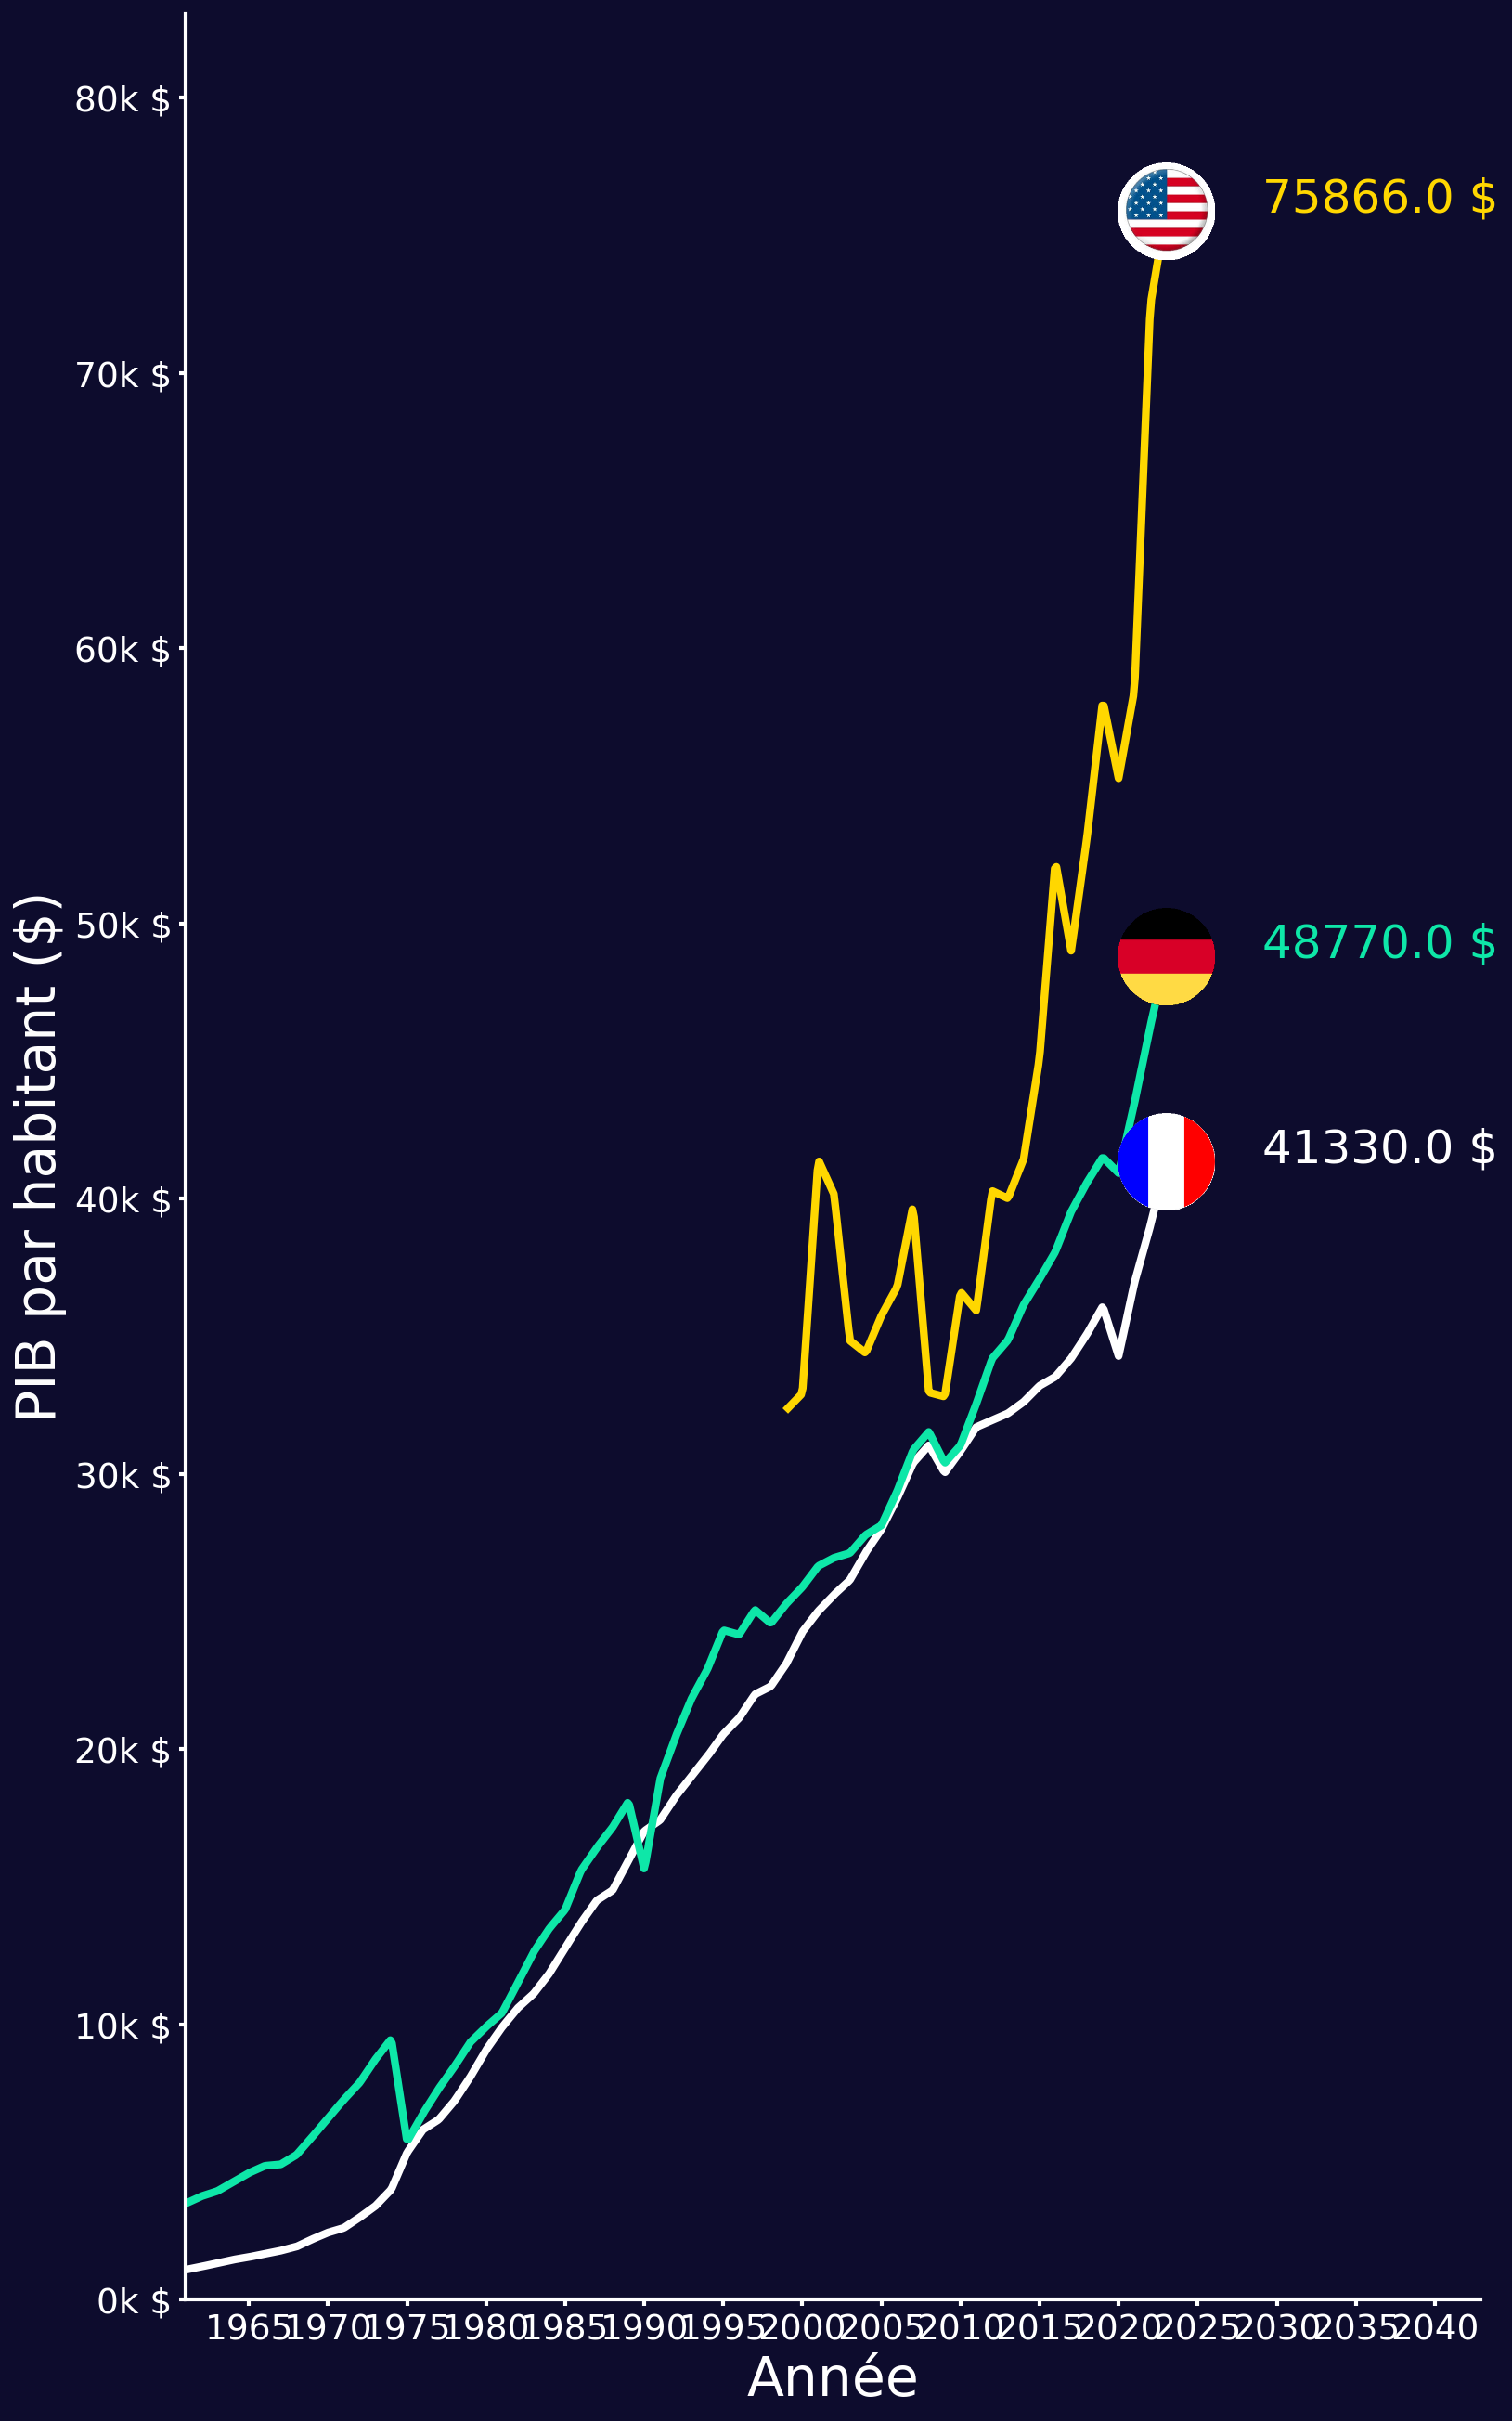

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.dates as mdates
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image, ImageOps, ImageDraw

def circular_mask(image_path, size):
    img = Image.open(image_path).convert("RGBA")
    img = img.resize(size, Image.LANCZOS)

    mask = Image.new("L", img.size, 0)
    draw = ImageDraw.Draw(mask)
    draw.ellipse((0, 0) + img.size, fill=255)

    output = ImageOps.fit(img, mask.size, centering=(0.5, 0.5))
    output.putalpha(mask)

    return output

# Load the CSV file
csv_file_path = "/content/GDP_per_capita_France_Germany_US.csv"
df_gdp = pd.read_csv(csv_file_path)

# Convert the 'Date' column to datetime format
df_gdp['Date'] = pd.to_datetime(df_gdp['Date'].astype(str) + '-01-01')

# Prepare data for interpolation and animation
x_data = df_gdp['Date'].values.astype('datetime64[D]')
total_frames = 20 * 30  # 20 seconds at 30 frames per second
time_interp = np.linspace(0, len(x_data) - 1, total_frames)
x_interp = np.interp(time_interp, np.arange(len(x_data)), x_data.astype(np.int64)).astype('datetime64[D]')
y_interp_france = np.interp(time_interp, np.arange(len(df_gdp)), df_gdp['PIB par habitant (France)'])
y_interp_germany = np.interp(time_interp, np.arange(len(df_gdp)), df_gdp['PIB par habitant (Germany)'])
y_interp_us = np.interp(time_interp, np.arange(len(df_gdp)), df_gdp['PIB par habitant (US)'])

# Load and transform flag images
flag_france = circular_mask("/content/drapeau_france.png", (200, 200))
flag_germany = circular_mask("/content/drapeau_allemagne.png", (200, 200))
flag_us = circular_mask("/content/drapeau_usa.png", (200, 200))

# Convert PIL images to numpy arrays
flag_france = np.array(flag_france)
flag_germany = np.array(flag_germany)
flag_us = np.array(flag_us)

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 21.33), dpi=150)

# Background color
fig.patch.set_facecolor('#0D0C2D')
ax1.set_facecolor('#0D0C2D')

# Remove top and right frames
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Configure the x-axis to show years every 5 years
ax1.xaxis.set_major_locator(mdates.YearLocator(5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Line colors
color_france = 'white'
color_germany = '#0EE7A8'
color_us = '#FFD700'

# Set axis and label colors to white and thicken the axes
ax1.spines['left'].set_color('white')
ax1.spines['bottom'].set_color('white')
ax1.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.tick_params(axis='x', colors='white', labelsize=18, width=2)
ax1.tick_params(axis='y', colors='white', labelsize=18, width=2)
ax1.yaxis.label.set_color('white')
ax1.xaxis.label.set_color('white')

# Format y-axis to show values in thousands of dollars
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1000)}k $'))

# Create the data lines with increased thickness
line_france, = ax1.plot([], [], label='France', lw=4, color=color_france)
line_germany, = ax1.plot([], [], label='Germany', lw=4, color=color_germany)
line_us, = ax1.plot([], [], label='US', lw=4, color=color_us)

# Initialize the function for setting up the animation
def init():
    line_france.set_data([], [])
    line_germany.set_data([], [])
    line_us.set_data([], [])
    ax1.set_xlim(x_interp.min(), x_interp.max() + np.timedelta64(3652, 'D') * 3)  # Further increased right margin
    ax1.set_ylim(0, max(y_interp_france.max(), y_interp_germany.max(), np.nanmax(y_interp_us)) * 1.1)
    ax1.set_xlabel('Année', fontsize=28)
    ax1.set_ylabel('PIB par habitant ($)', fontsize=28, color='white')
    return line_france, line_germany, line_us

# Function to check and avoid overlap of annotations
def avoid_overlap(ann1, ann2):
    return abs(ann1.xy[1] - ann2.xy[1]) < 600  # Greatly increased sensitivity

# Function to update the animation
def update(frame):
    # Update the data lines
    line_france.set_data(x_interp[:frame], y_interp_france[:frame])
    line_germany.set_data(x_interp[:frame], y_interp_germany[:frame])
    line_us.set_data(x_interp[:frame], y_interp_us[:frame])

    # Update the axis limits if the sequence is not empty
    if frame > 0:
        current_max = max(
            np.nanmax(y_interp_france[:frame]),
            np.nanmax(y_interp_germany[:frame]),
            np.nanmax(y_interp_us[:frame])
        ) * 1.1
        ax1.set_ylim(0, current_max)
        range_x = x_interp.max() - x_interp.min()
        ax1.set_xlim(x_interp[0], x_interp[0] + range_x * (frame / total_frames) + np.timedelta64(3652, 'D') * 2)

        for ann in ax1.texts:
            ann.remove()
        for artist in ax1.artists:
            artist.remove()

        # Add annotations
        ann_france = ax1.annotate(
            f"{y_interp_france[frame]:.1f} $", (x_interp[frame], y_interp_france[frame]),
            textcoords="offset points", xytext=(50, 0), ha='left',  # Closer to the right
            color=color_france, fontsize=24
        )
        ann_germany = ax1.annotate(
            f"{y_interp_germany[frame]:.1f} $", (x_interp[frame], y_interp_germany[frame]),
            textcoords="offset points", xytext=(50, 0), ha='left',  # Closer to the right
            color=color_germany, fontsize=24
        )
        ann_us = ax1.annotate(
            f"{y_interp_us[frame]:.1f} $", (x_interp[frame], y_interp_us[frame]),
            textcoords="offset points", xytext=(50, 0), ha='left',  # Closer to the right
            color=color_us, fontsize=24
        )

        # Check and adjust for overlap between France and Germany annotations
        if avoid_overlap(ann_france, ann_germany):
            ann_germany.remove()
            ann_germany = ax1.annotate(
                f"{y_interp_germany[frame]:.1f} $", (x_interp[frame], y_interp_germany[frame] + 1200),  # Greatly increased vertical offset
                textcoords="offset points", xytext=(50, 0), ha='left',  # Adjusting the vertical offset
                color=color_germany, fontsize=24
            )

        # Check and adjust for overlap between US and Germany annotations
        if avoid_overlap(ann_germany, ann_us):
            ann_us.remove()
            ann_us = ax1.annotate(
                f"{y_interp_us[frame]:.1f} $", (x_interp[frame], y_interp_us[frame] + 1200),  # Greatly increased vertical offset
                textcoords="offset points", xytext=(50, 0), ha='left',  # Adjusting the vertical offset
                color=color_us, fontsize=24
            )

        # Add flag images
        flag_france_image = OffsetImage(flag_france, zoom=0.25)  # Adjusted zoom for 200x200 size
        flag_germany_image = OffsetImage(flag_germany, zoom=0.25)  # Adjusted zoom for 200x200 size
        flag_us_image = OffsetImage(flag_us, zoom=0.25)  # Adjusted zoom for 200x200 size

        flag_france_annot = AnnotationBbox(flag_france_image, (x_interp[frame], y_interp_france[frame]), frameon=False)
        flag_germany_annot = AnnotationBbox(flag_germany_image, (x_interp[frame], y_interp_germany[frame]), frameon=False)
        flag_us_annot = AnnotationBbox(flag_us_image, (x_interp[frame], y_interp_us[frame]), frameon=False)

        ax1.add_artist(flag_france_annot)
        ax1.add_artist(flag_germany_annot)
        ax1.add_artist(flag_us_annot)

    return line_france, line_germany, line_us

# Create the animation with 30 frames per second (interval=1000/30 milliseconds)
ani = FuncAnimation(fig, update, frames=total_frames, init_func=init, blit=True, interval=1000/30, repeat=False)

# Save the animation as a video file
ani.save('gdp_animation.mp4', writer='ffmpeg')

# Display the animation in the notebook
HTML('<video controls src="gdp_animation.mp4" type="video/mp4">')
